Now requires JHU_Each_State_Capture_and_Serialize_JHU_Latest_Data to be run first. Once ran a serialized version of the latest JHU data will be available locally thus avoiding multiple data fetches for the various related routines

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from datetime import date, timedelta
import datetime
import matplotlib.dates as mdates
%matplotlib inline

Update end date below to the previous day's date

In [2]:
yesterday = date.today() - timedelta(days=1)
yesterday.strftime('%m/%d/%Y')

'11/29/2021'

In [3]:
df_jhu_us_dict = pd.read_pickle(yesterday.strftime('%d_%b_%Y') + r'_JHU_data.pkl')

In [4]:
x = pd.date_range(start='4/12/2020', end=yesterday)
#x = pd.date_range(start='7/12/2021', end='9/08/2021')

In [5]:
date_list = []
for date_value in x.strftime('%m-%d-%Y'):
    date_list.append(date_value)
dt_date_list = pd.to_datetime(pd.Series(date_list))

In [6]:
list(df_jhu_us_dict.keys())[0]

'04-12-2020'

In [7]:
State_list =list(df_jhu_us_dict[list(df_jhu_us_dict.keys())[0]].Province_State)

In [8]:
State_list.remove('Recovered')

In [9]:
State_list

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'Diamond Princess',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Grand Princess',
 'Guam',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Puerto Rico',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming',
 'American Samoa',
 'Northern Mariana Islands',
 'Virgin Islands']

In [10]:
def process_state_deaths(passed_state):
    print(passed_state)
    aaa = df_jhu_us_dict[date_list[0]].loc[df_jhu_us_dict[date_list[0]].Province_State == passed_state]
#    print(aaa)
    for d_value in date_list[1:]:
        aaa = aaa.append(df_jhu_us_dict[d_value].loc[df_jhu_us_dict[d_value].Province_State == passed_state])
#    return(xxx)
    bbb = aaa.loc[:,['dt_date','Deaths']]
    ccc = bbb.set_index('dt_date')
    ddd = ccc.diff(periods = 1)
    ddd_7day_moving = ddd.rolling(7).mean().shift()
    return(ddd,passed_state,ddd_7day_moving)

In [11]:
def chart_daily_deaths(passed_df, passed_state_name, ddd_7day_moving):
    months = mdates.MonthLocator()
    days = mdates.DayLocator()
    timeFmt = mdates.DateFormatter('%b %Y')
    fig, ax = plt.subplots()
    fig.set_size_inches(18,10)
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(months)
    plt.title('Johns Hopkins University ***' + passed_state_name + '*** Daily COVID Deaths')
    plt.xlabel('Date',color='black')
    plt.ylabel('New COVID Deaths',color='black')
    plt.bar(passed_df.index,passed_df.Deaths)
    plt.plot(ddd_7day_moving,'ro-')
    plt.legend(['7 Day Rolling Average','Daily Deaths'])
    fig.savefig('JHUDaily '+ passed_state_name + ' Deaths.png')
plt.close()

Alabama
Alaska
Arizona
Arkansas
California
Colorado
Connecticut
Delaware
Diamond Princess
District of Columbia
Florida
Georgia
Grand Princess
Guam
Hawaii
Idaho
Illinois
Indiana
Iowa
Kansas
Kentucky


<ipython-input-11-a5441a21e520>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Louisiana
Maine
Maryland
Massachusetts
Michigan
Minnesota
Mississippi
Missouri
Montana
Nebraska
Nevada
New Hampshire
New Jersey
New Mexico
New York
North Carolina
North Dakota
Ohio
Oklahoma
Oregon
Pennsylvania
Puerto Rico
Rhode Island
South Carolina
South Dakota
Tennessee
Texas
Utah
Vermont
Virginia
Washington
West Virginia
Wisconsin
Wyoming
American Samoa
Northern Mariana Islands
Virgin Islands


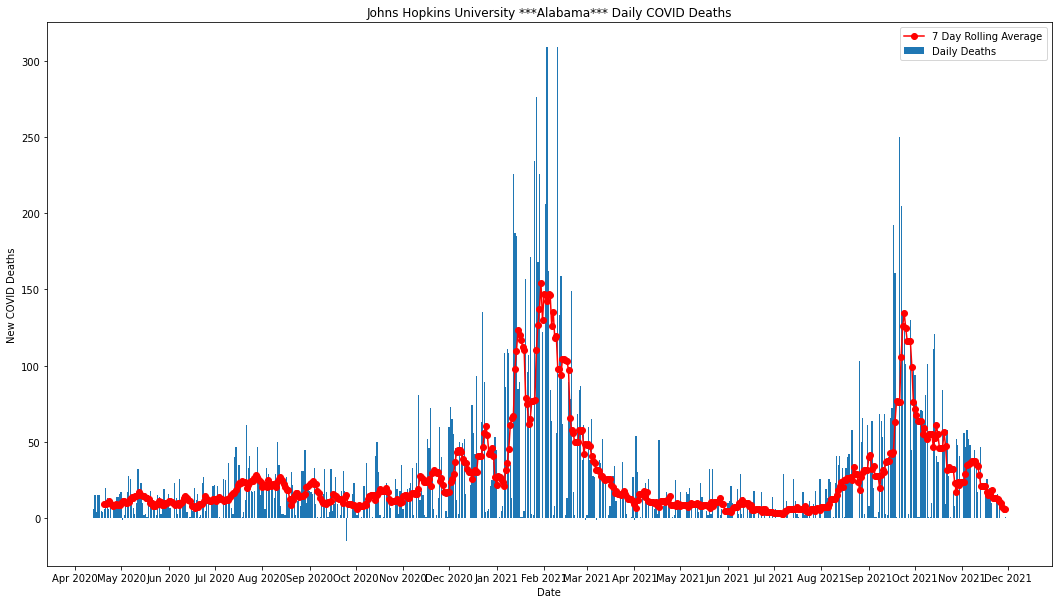

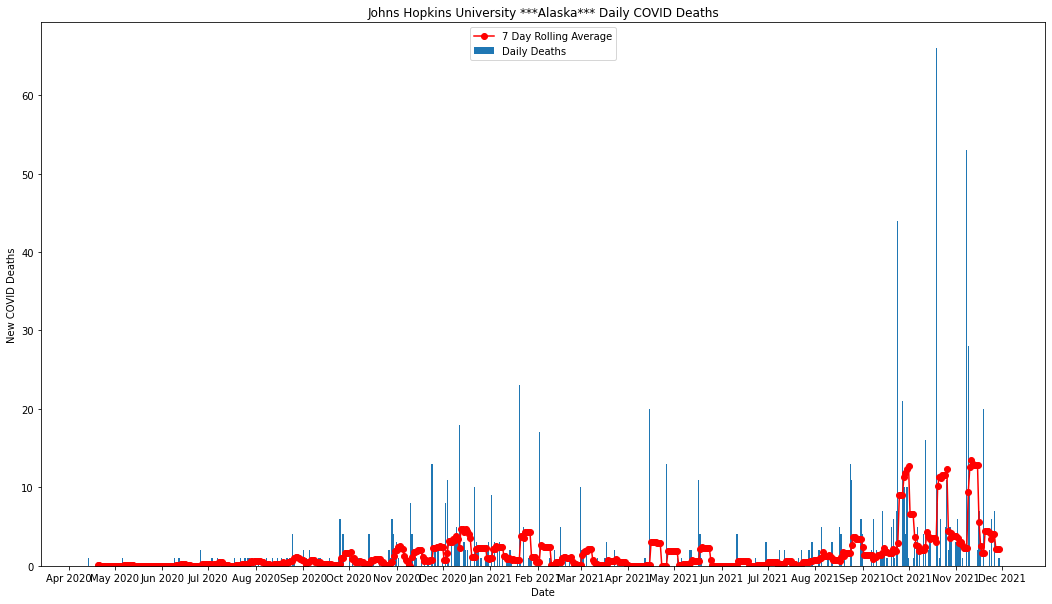

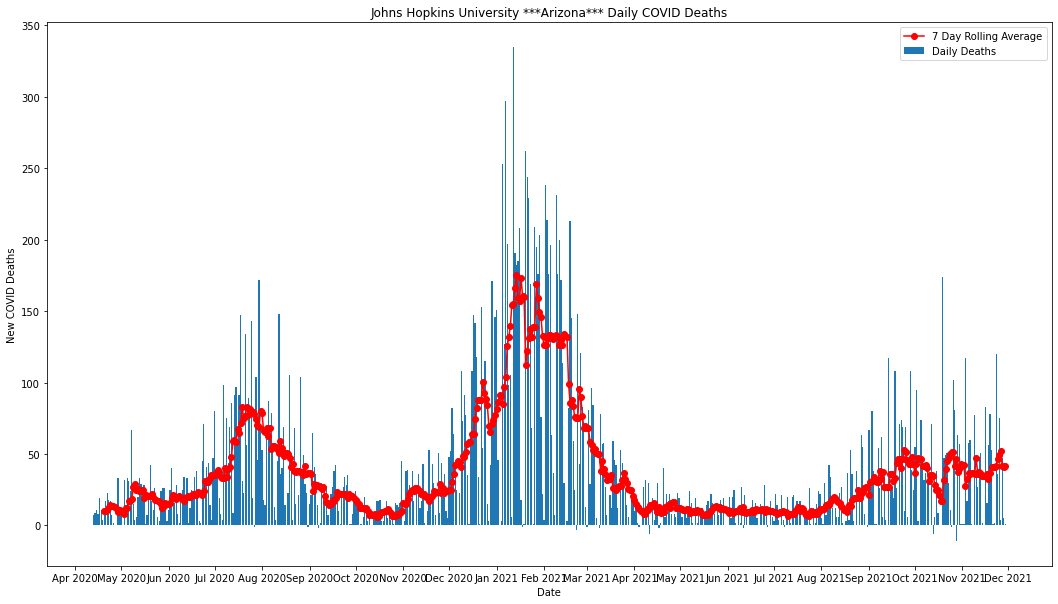

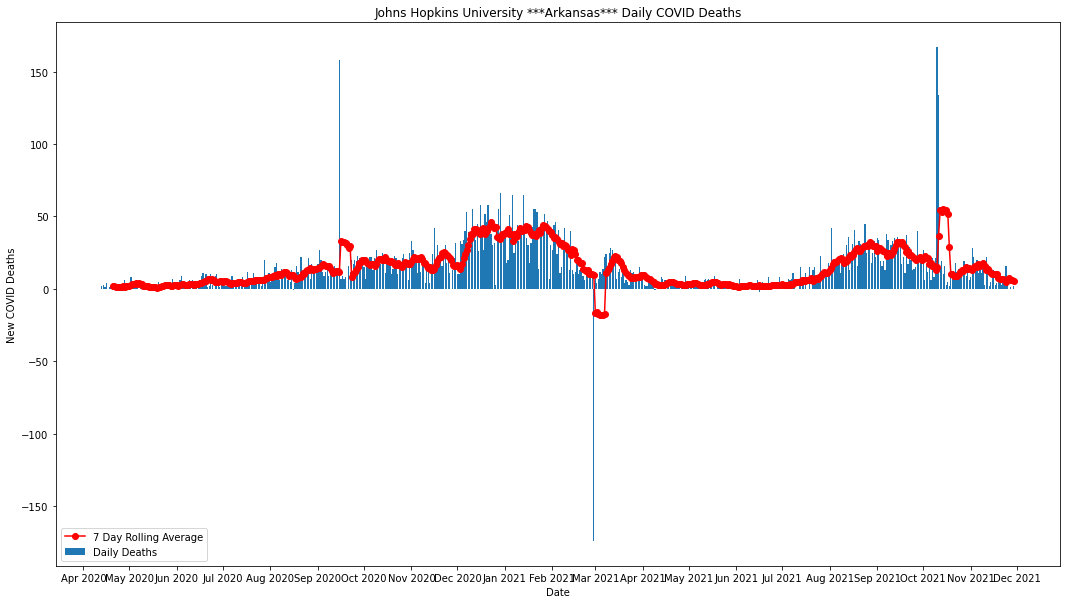

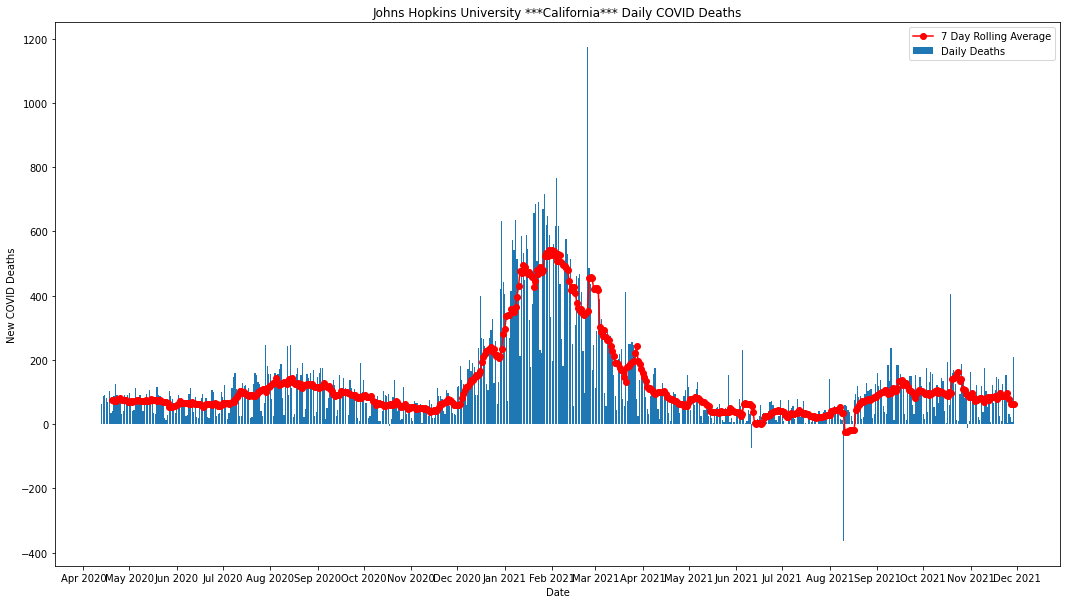

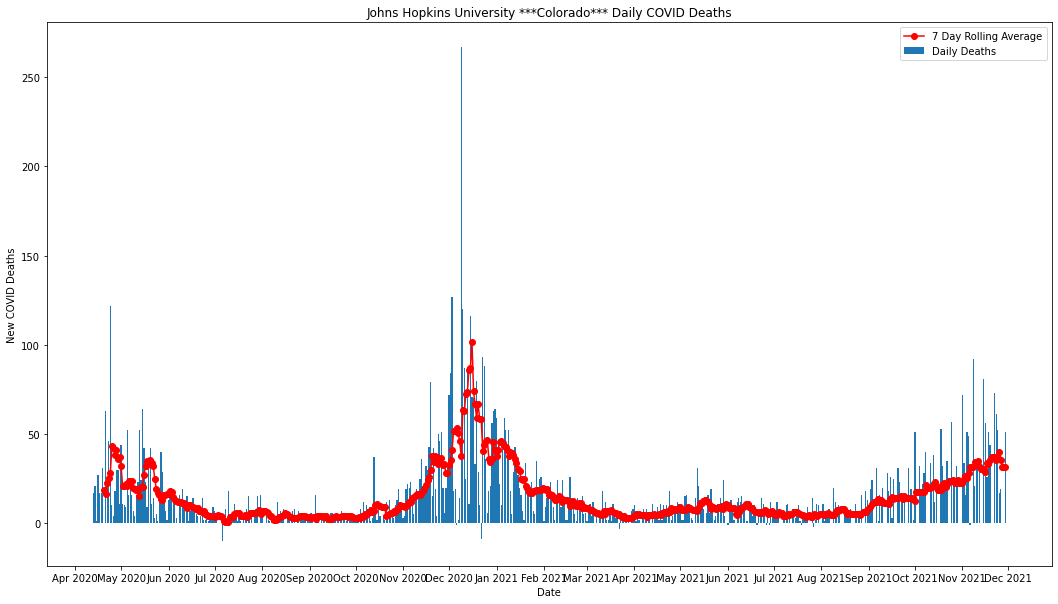

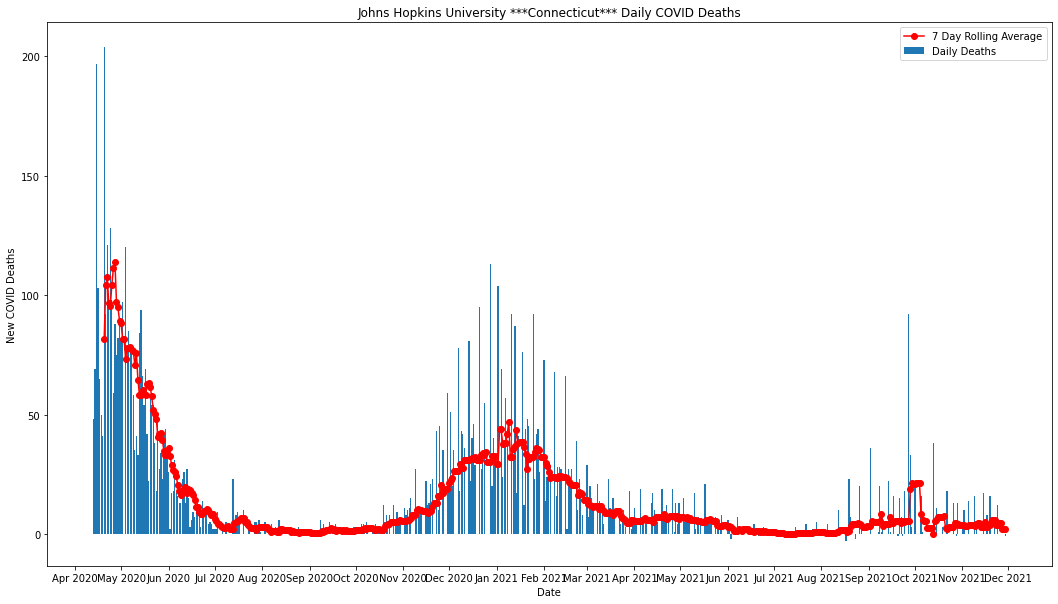

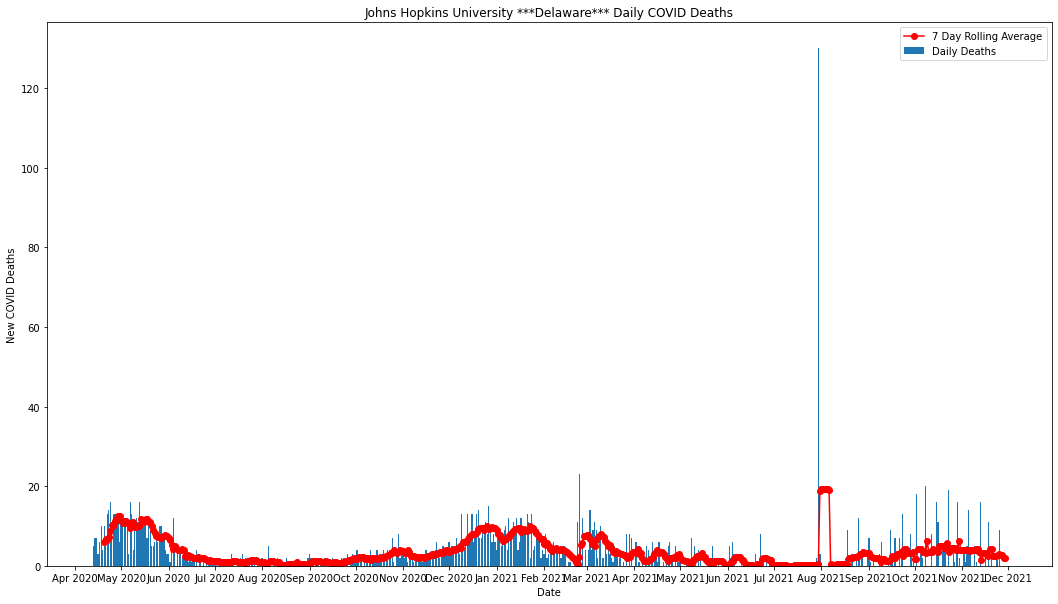

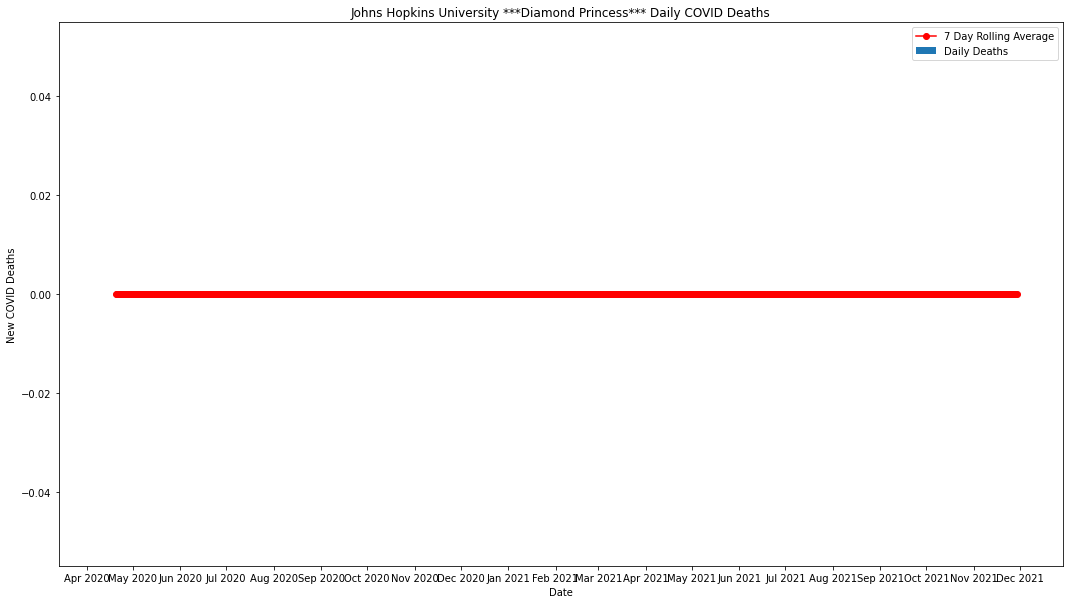

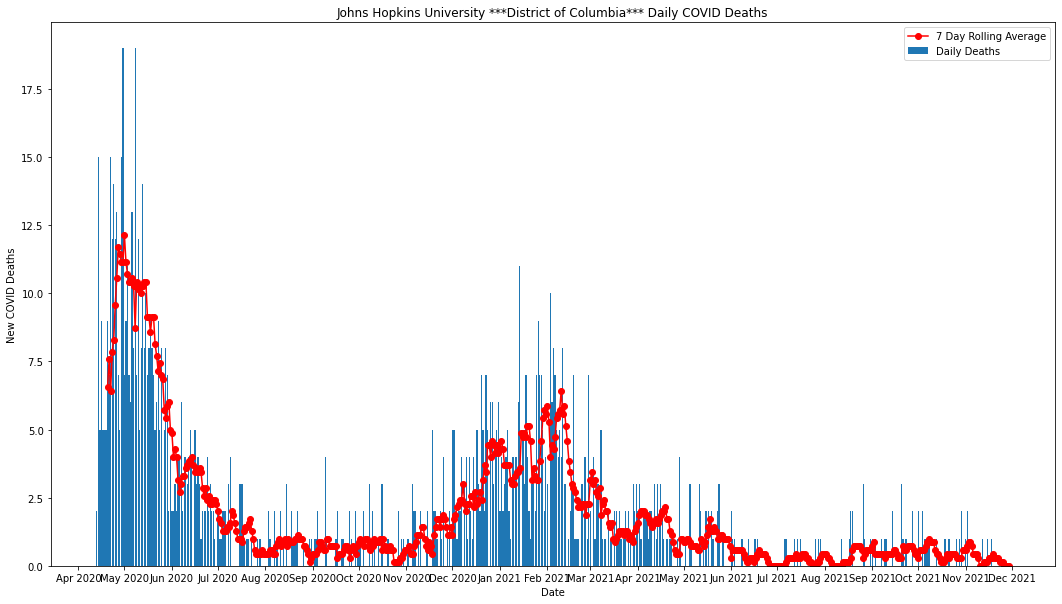

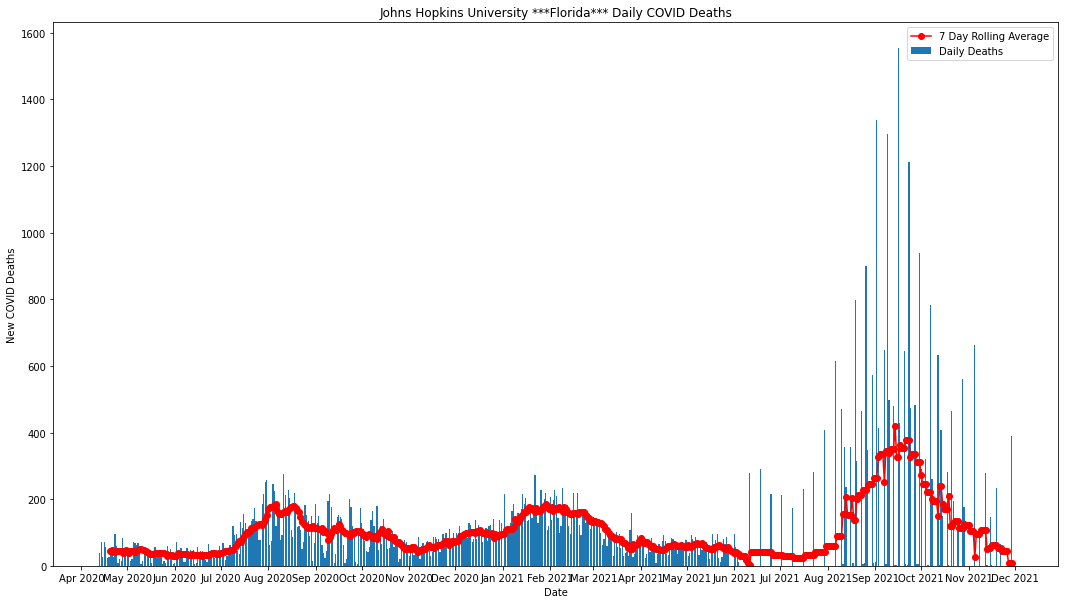

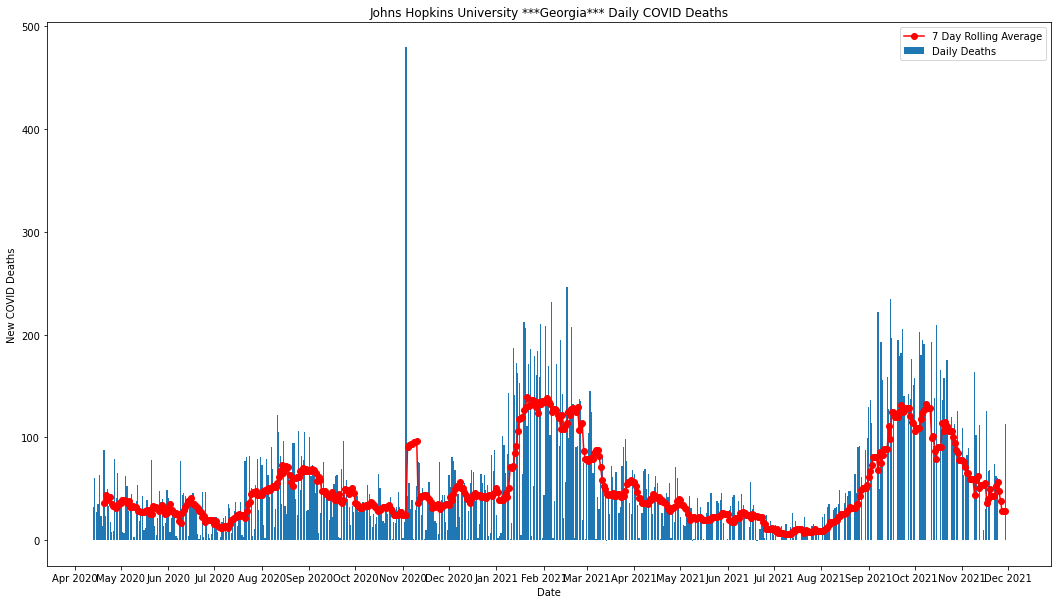

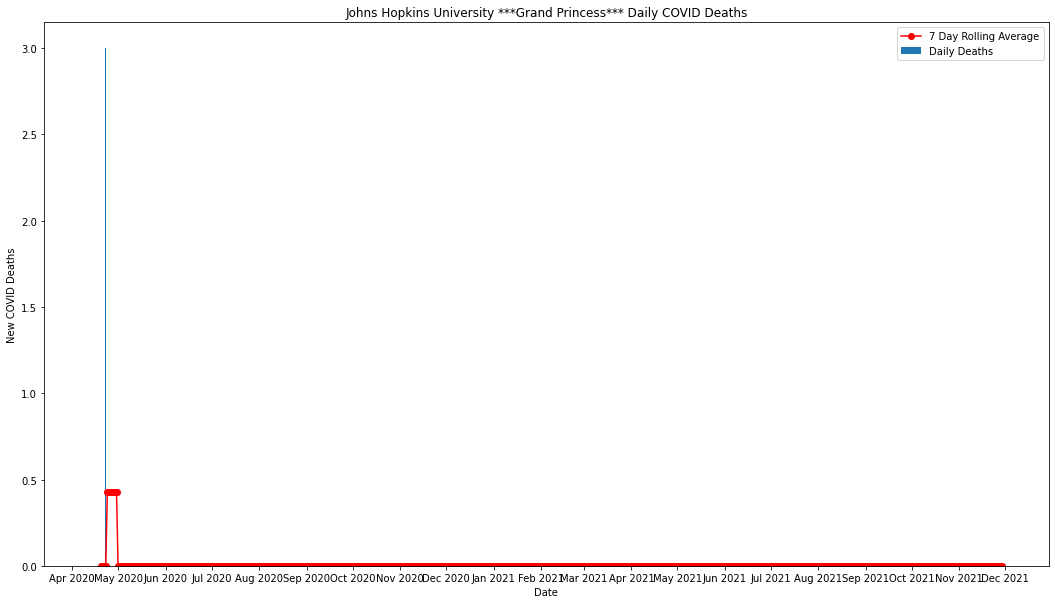

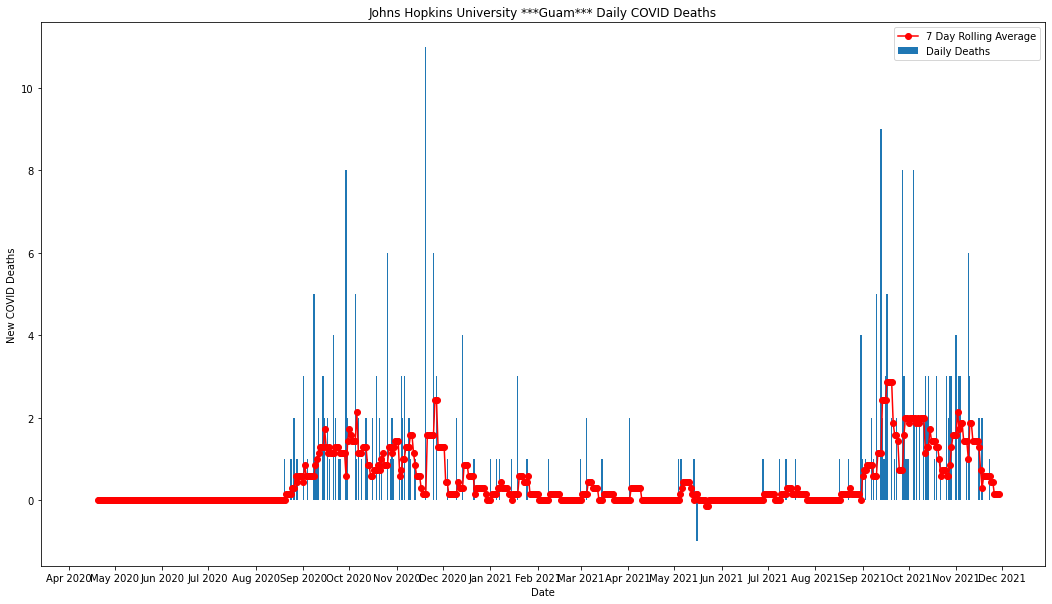

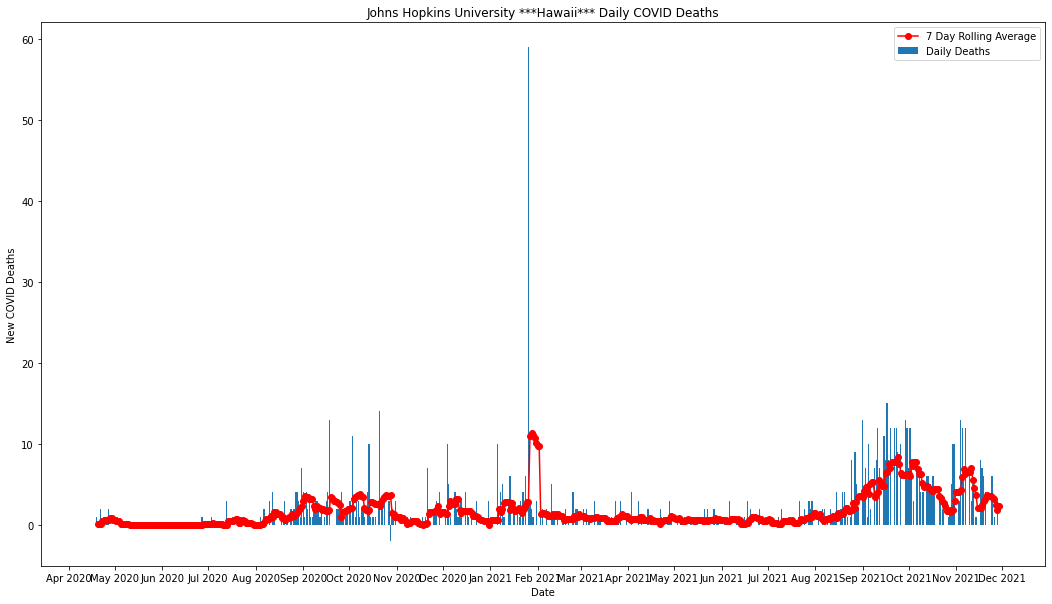

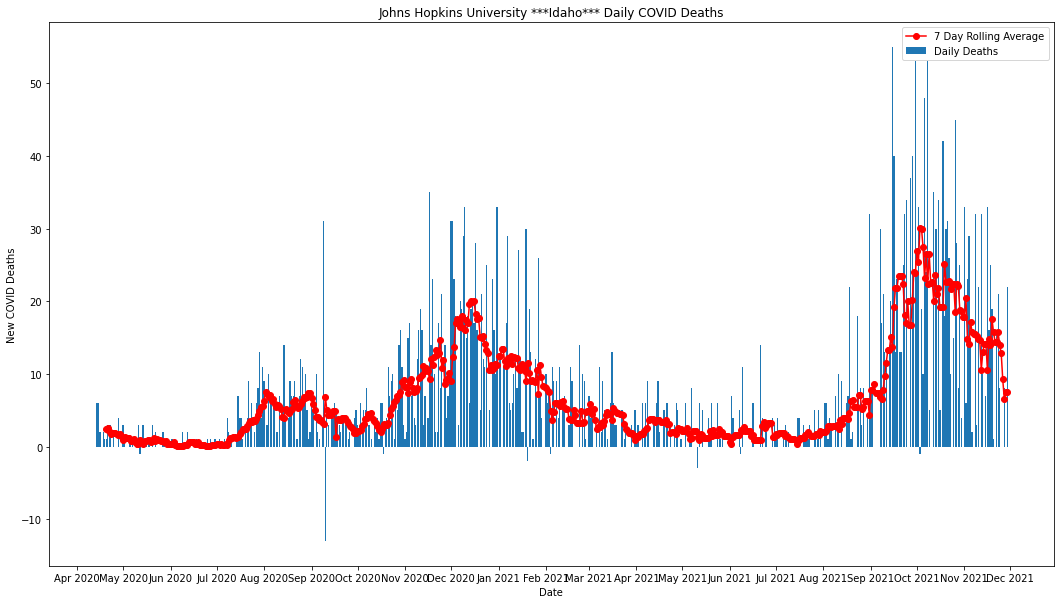

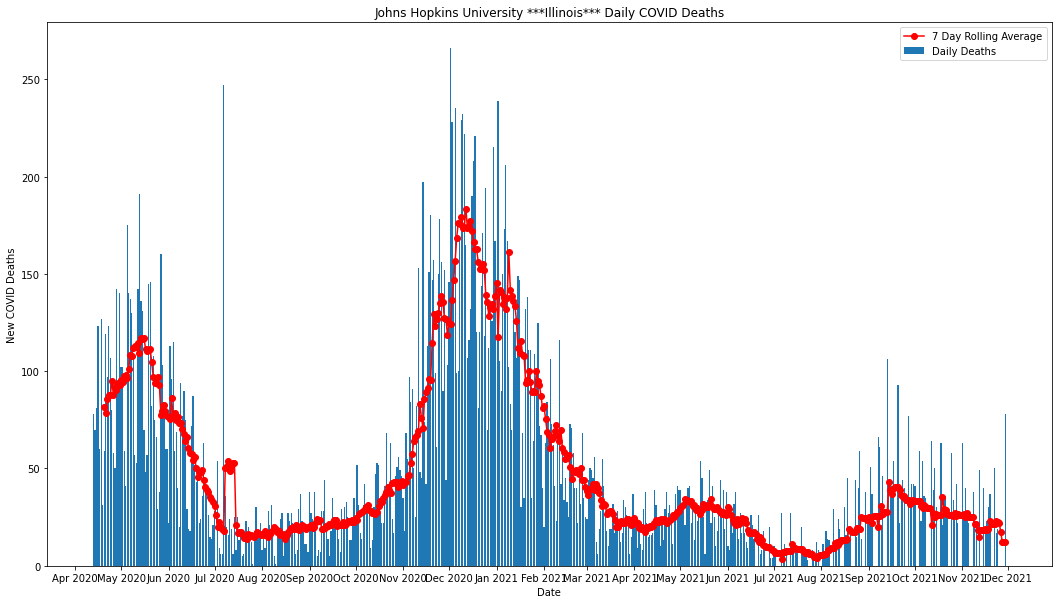

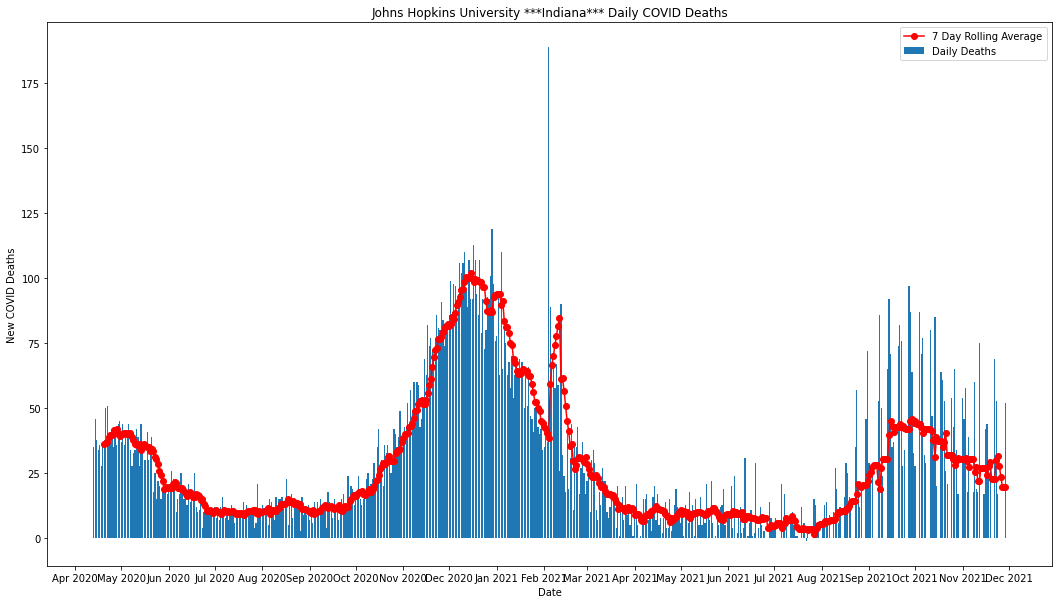

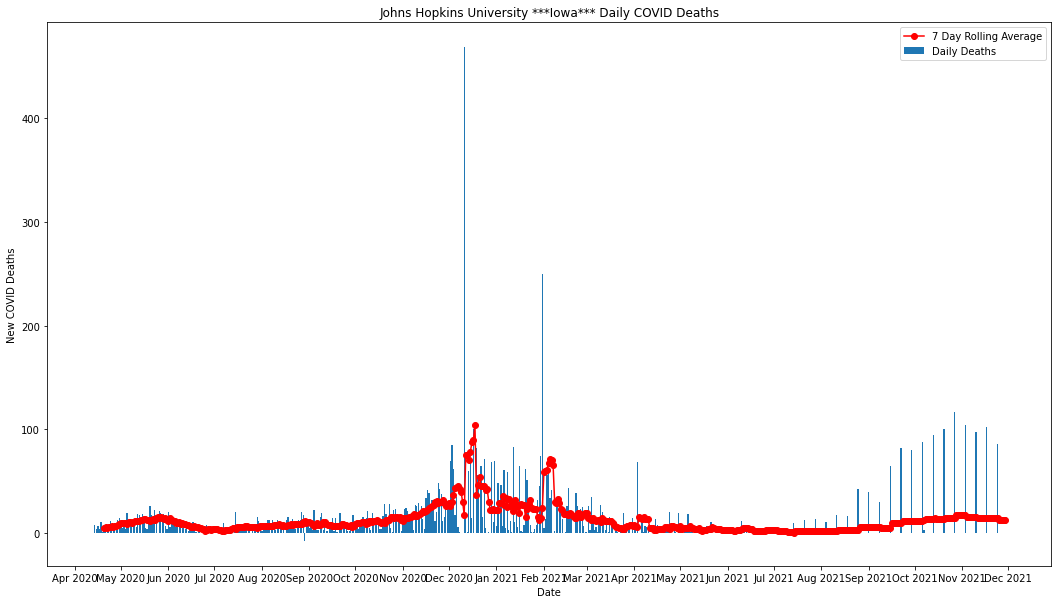

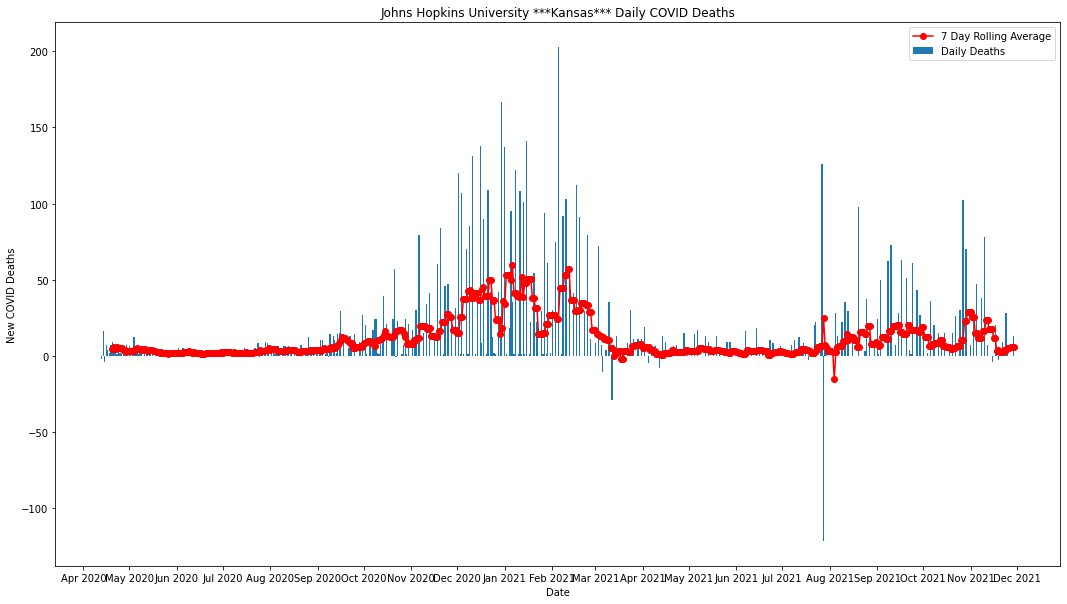

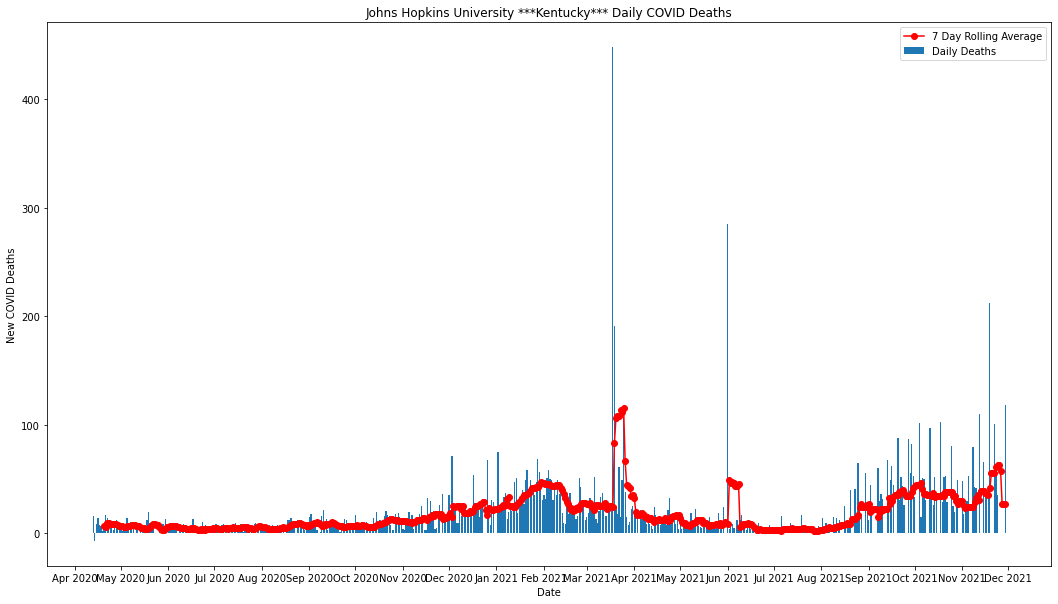

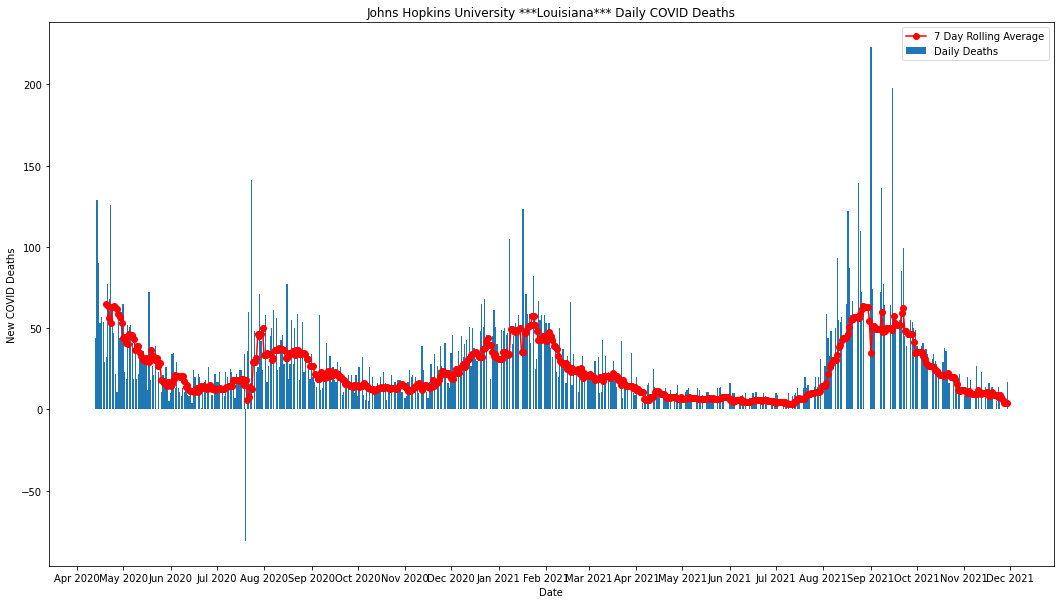

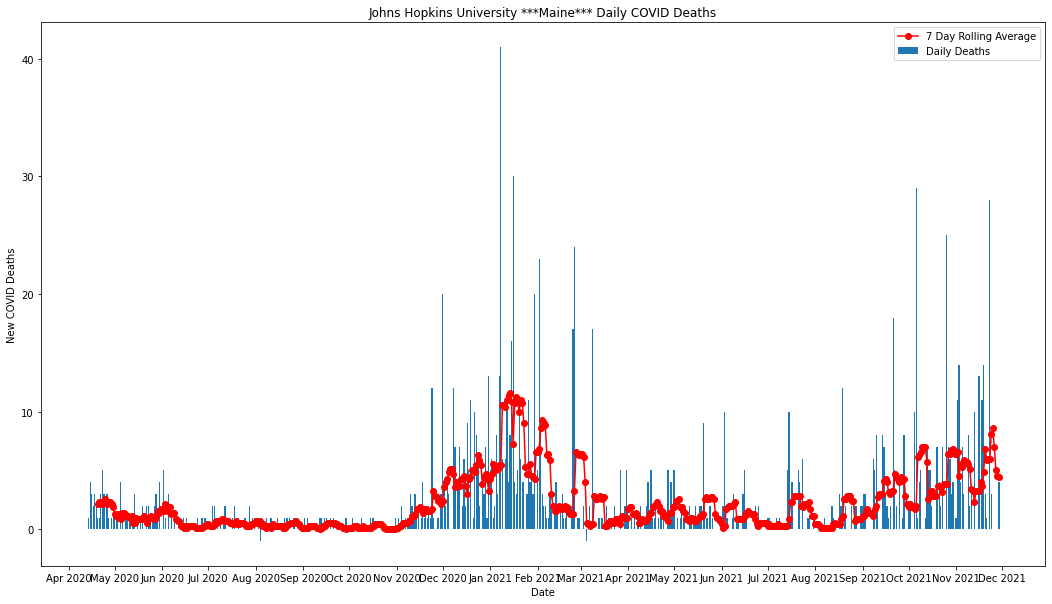

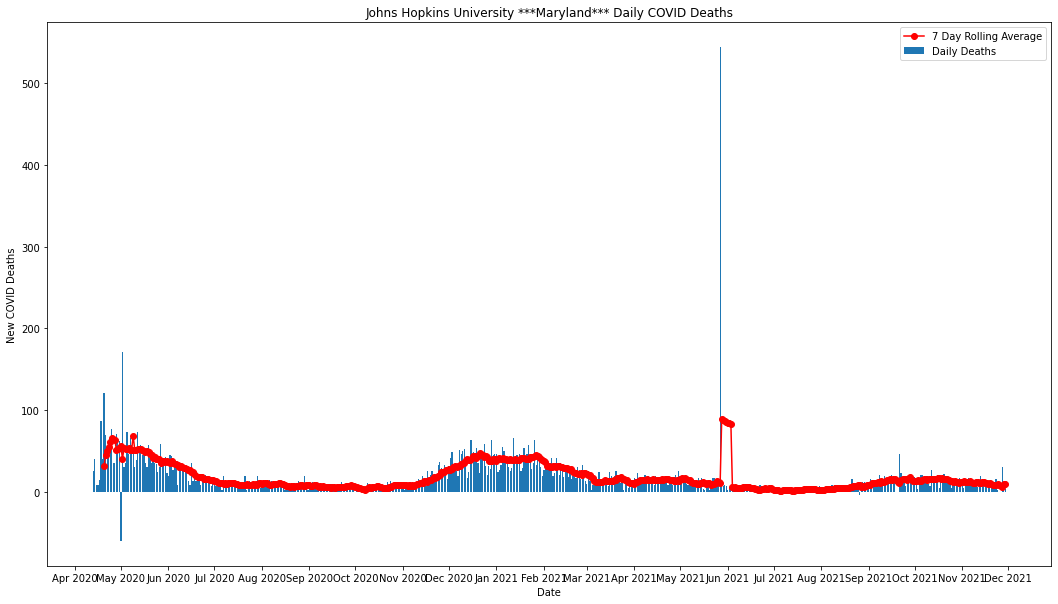

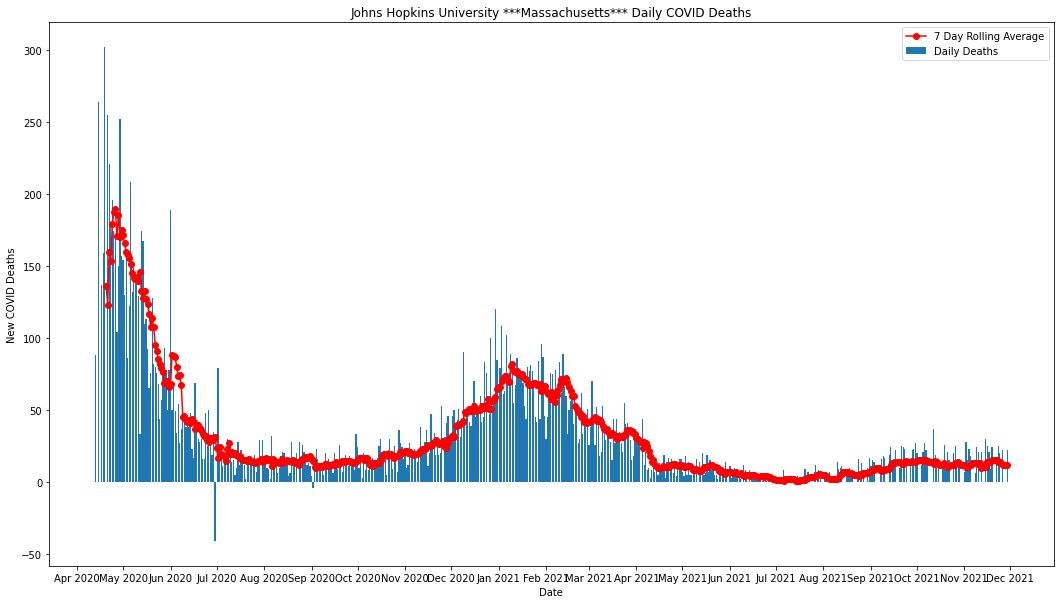

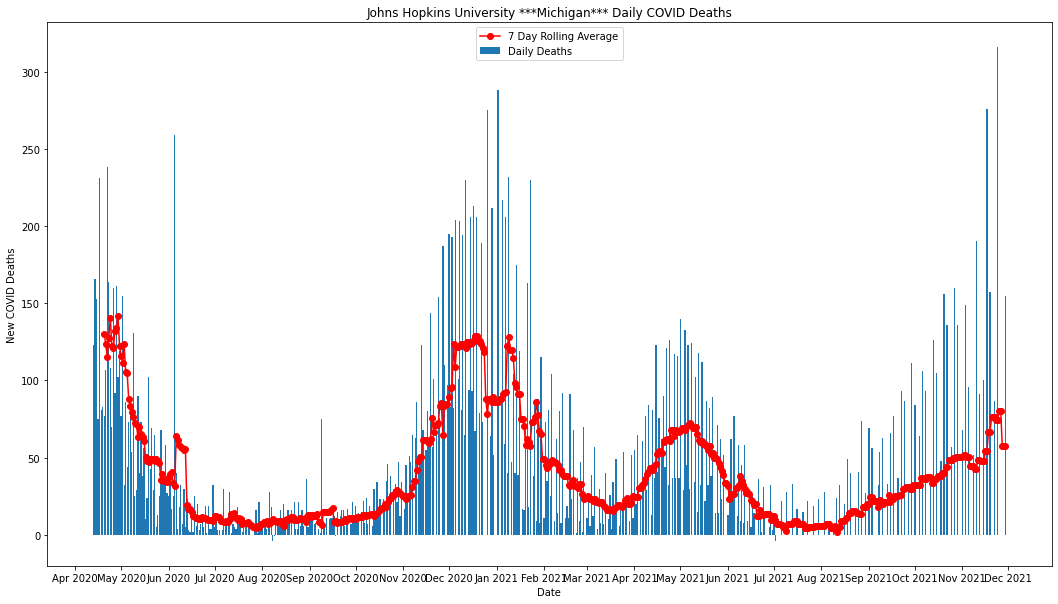

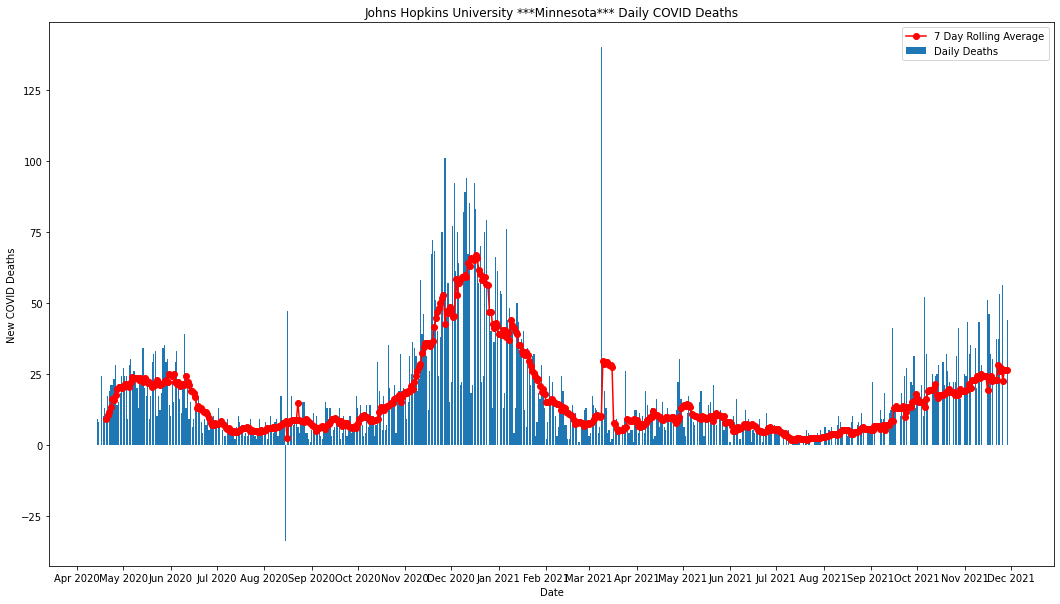

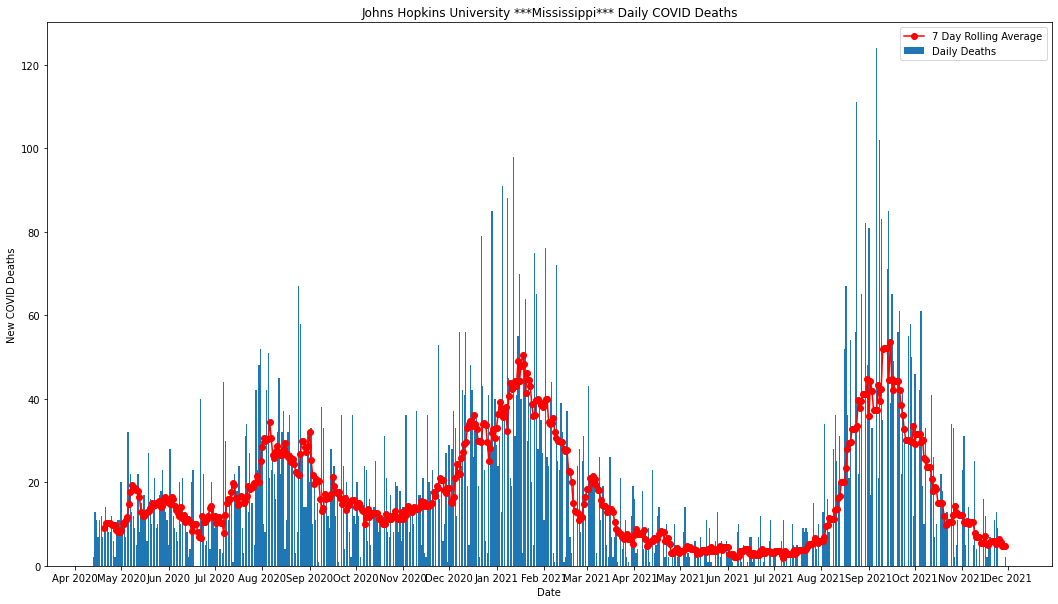

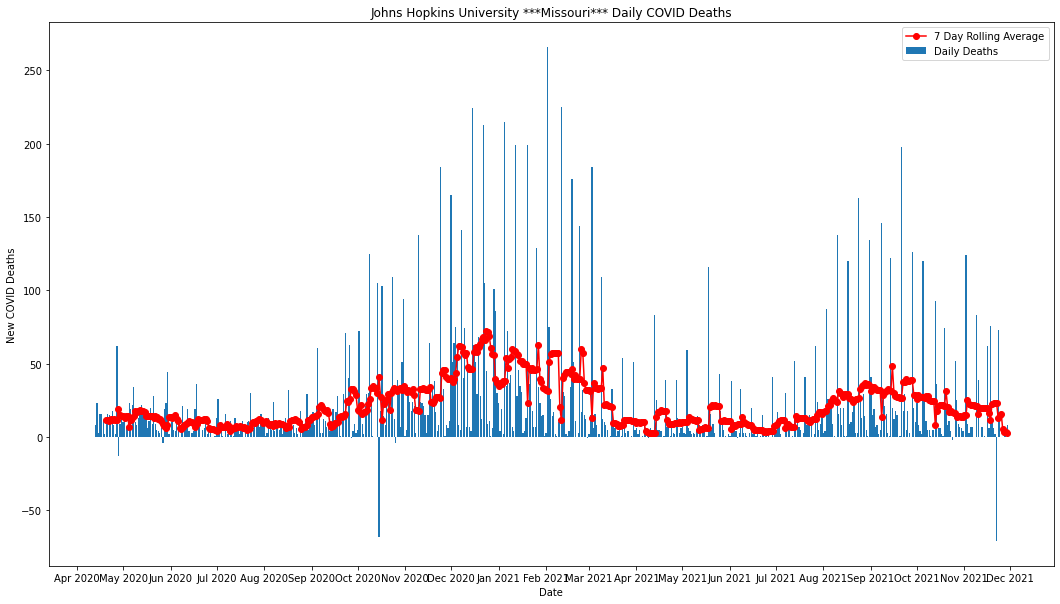

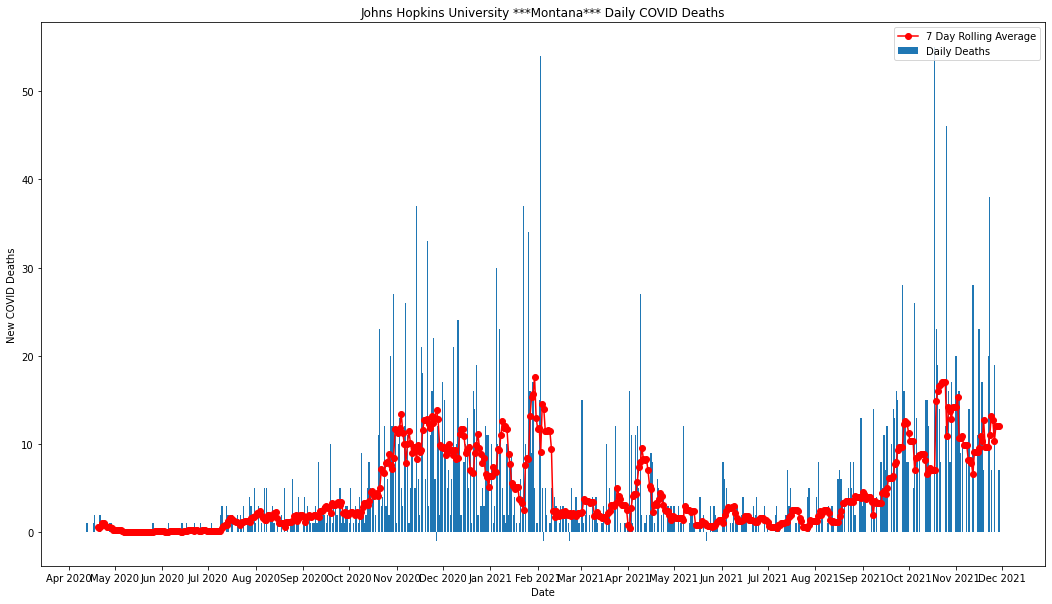

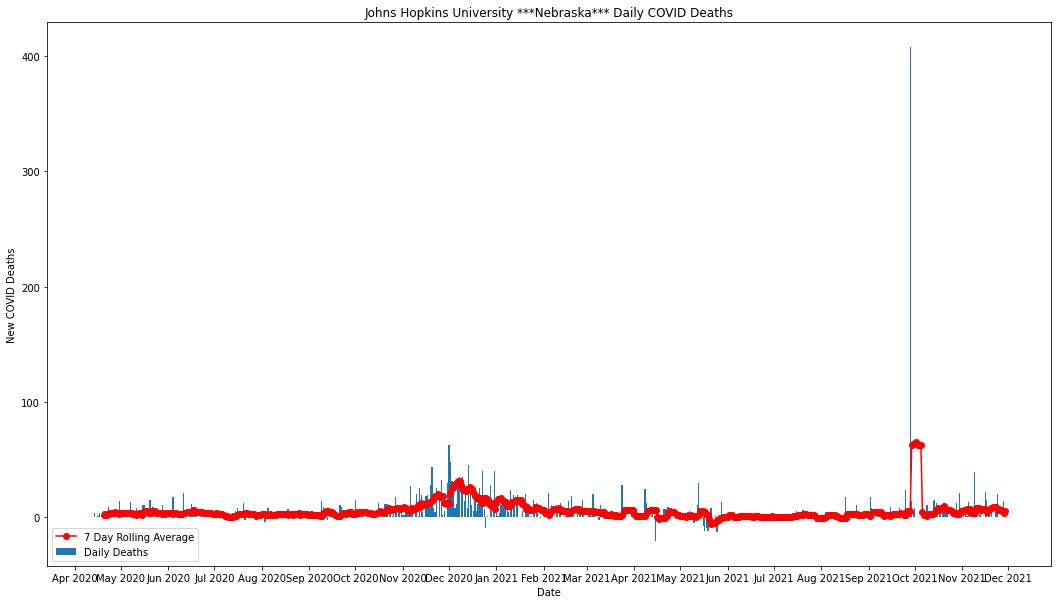

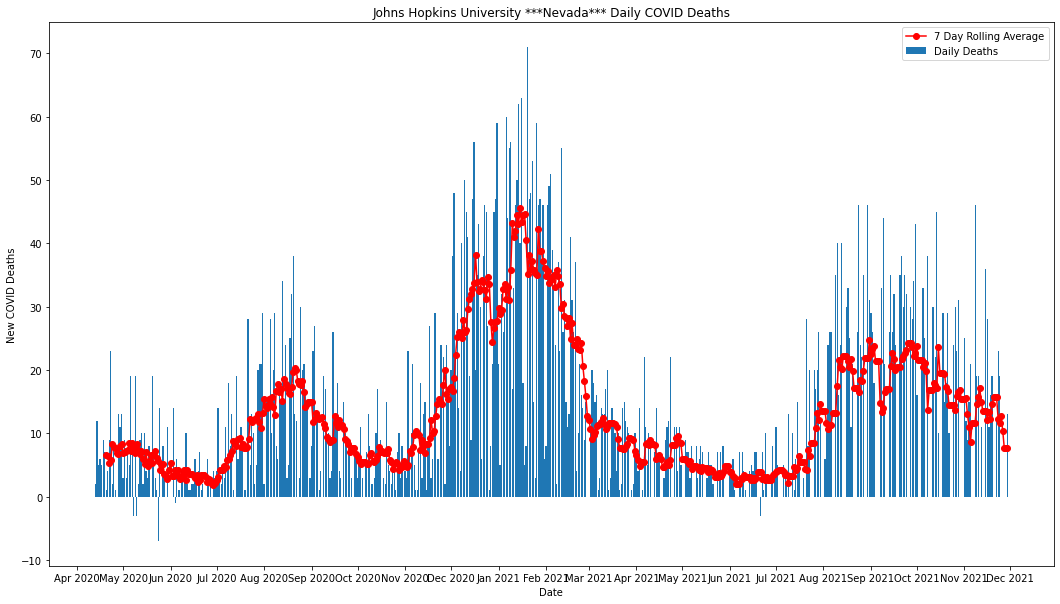

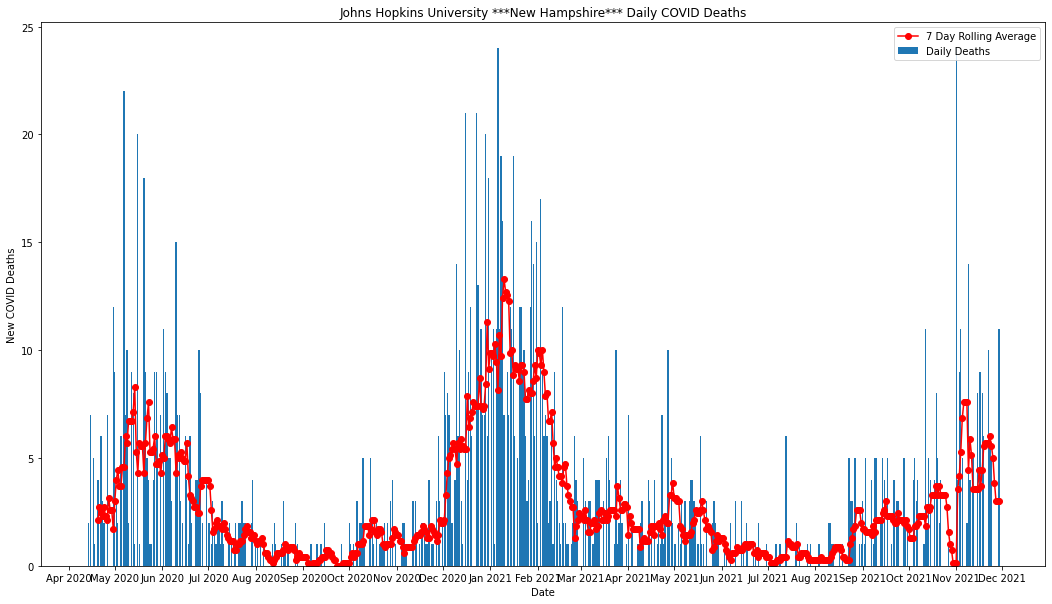

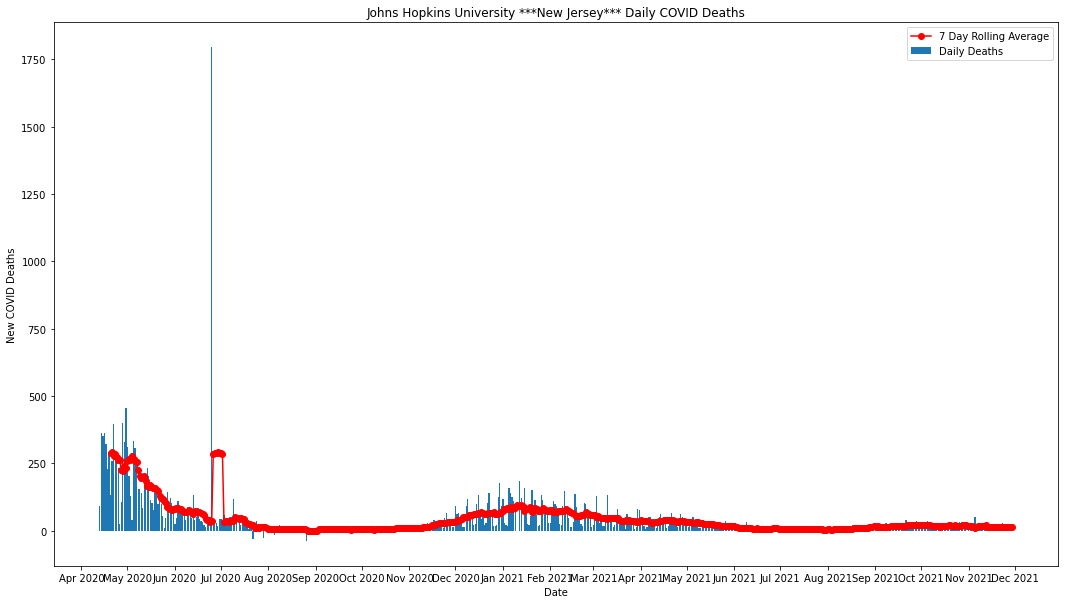

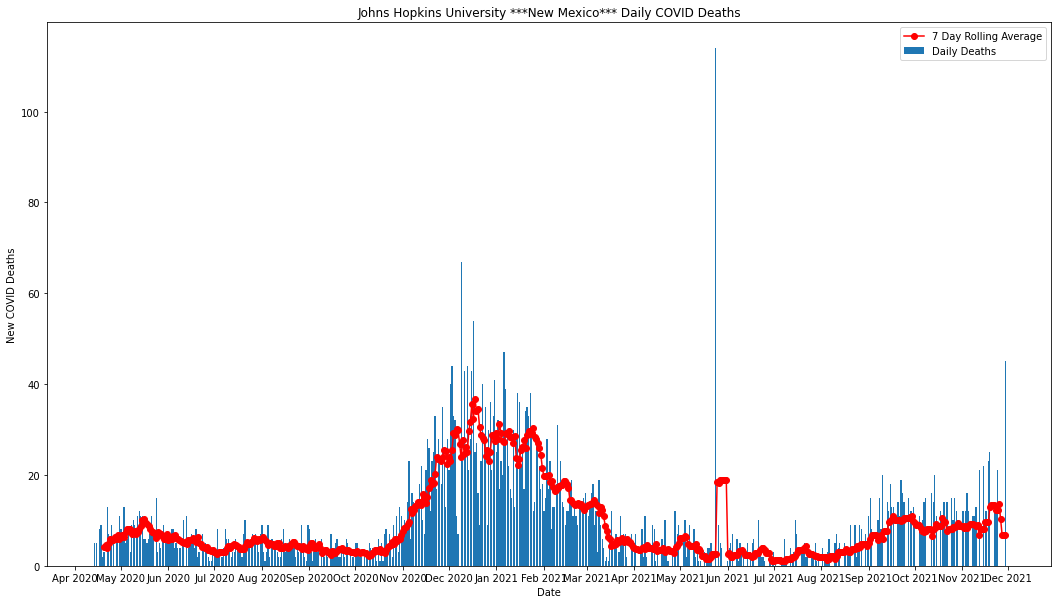

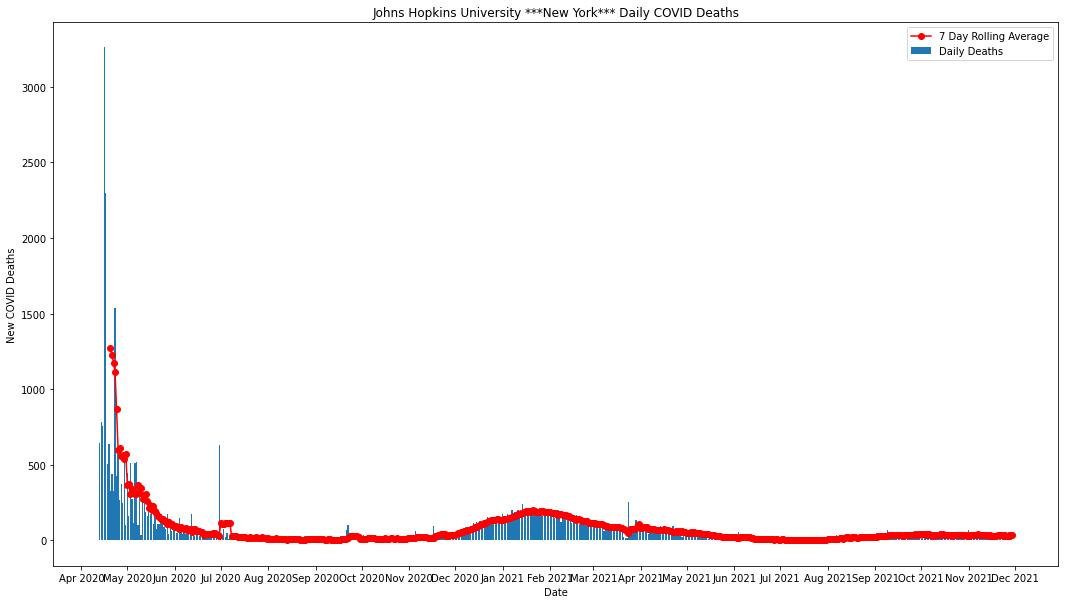

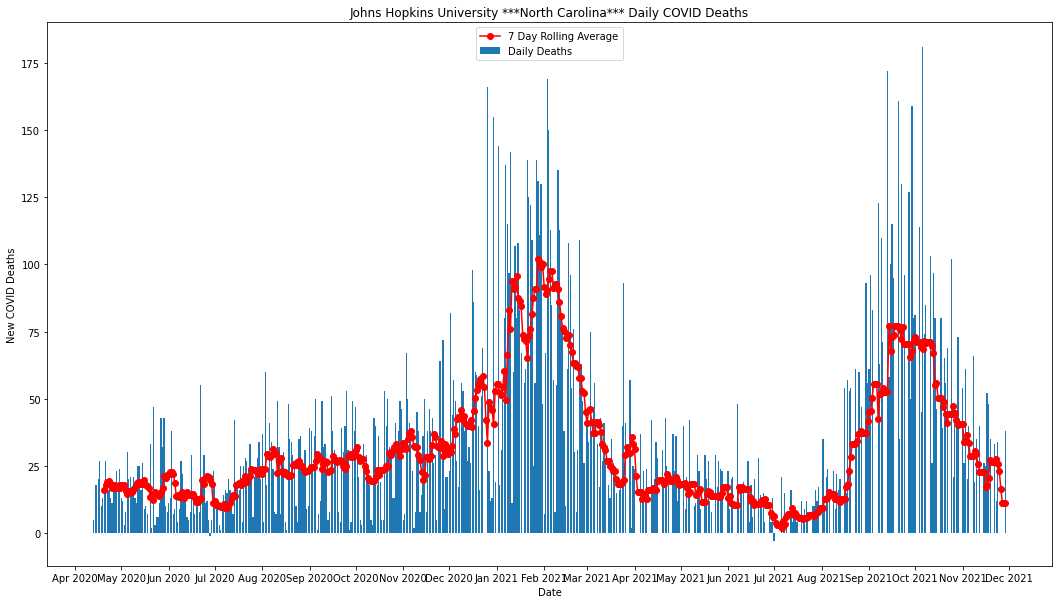

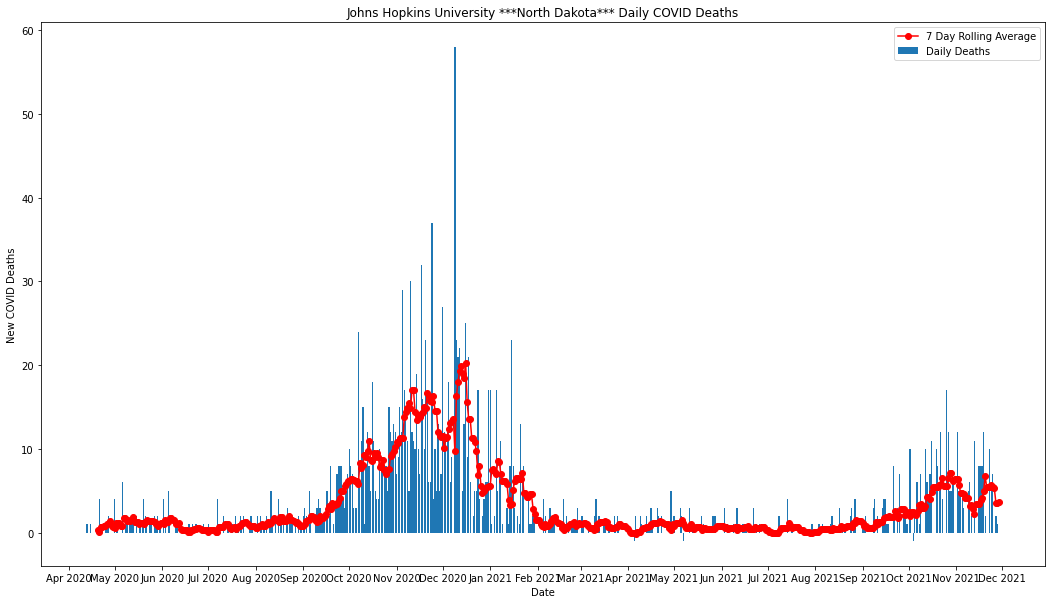

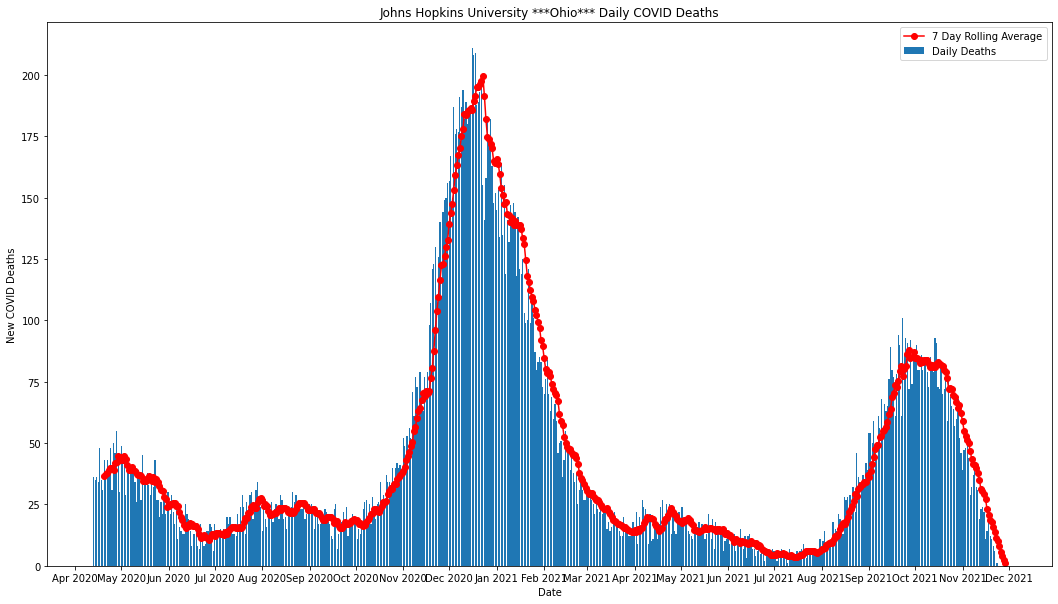

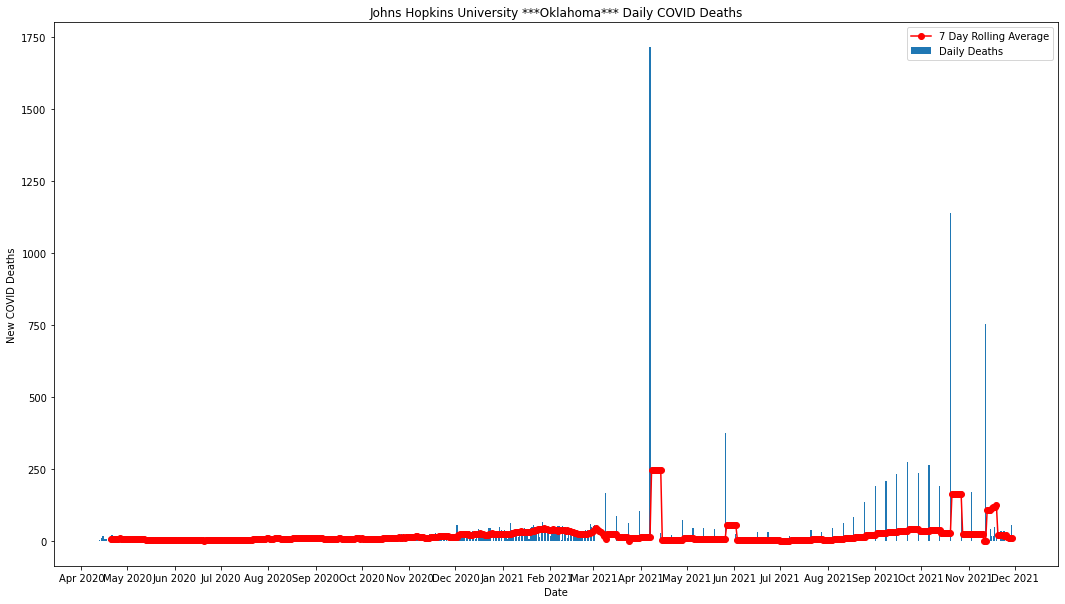

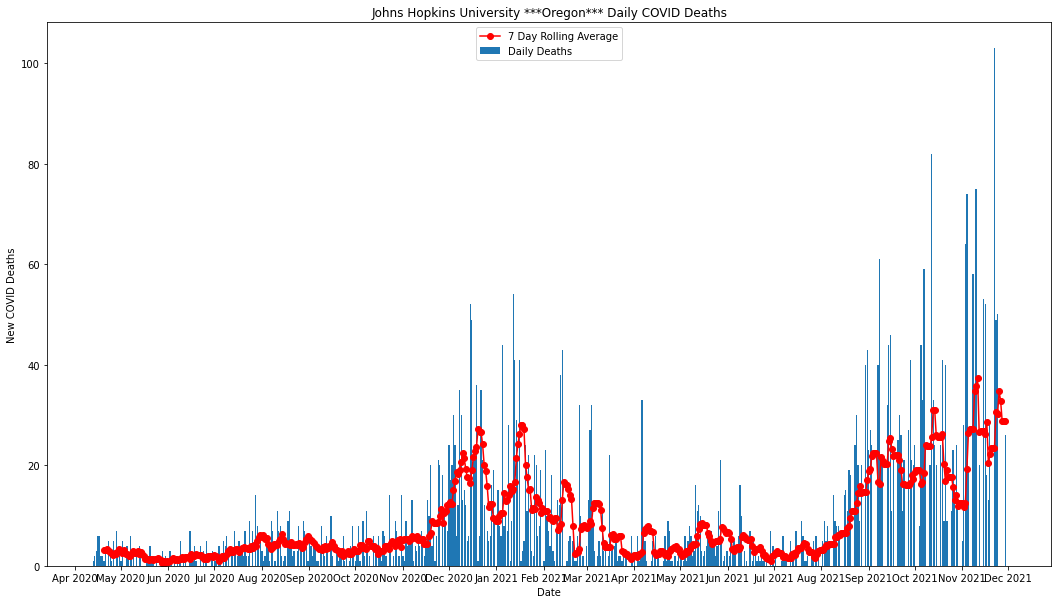

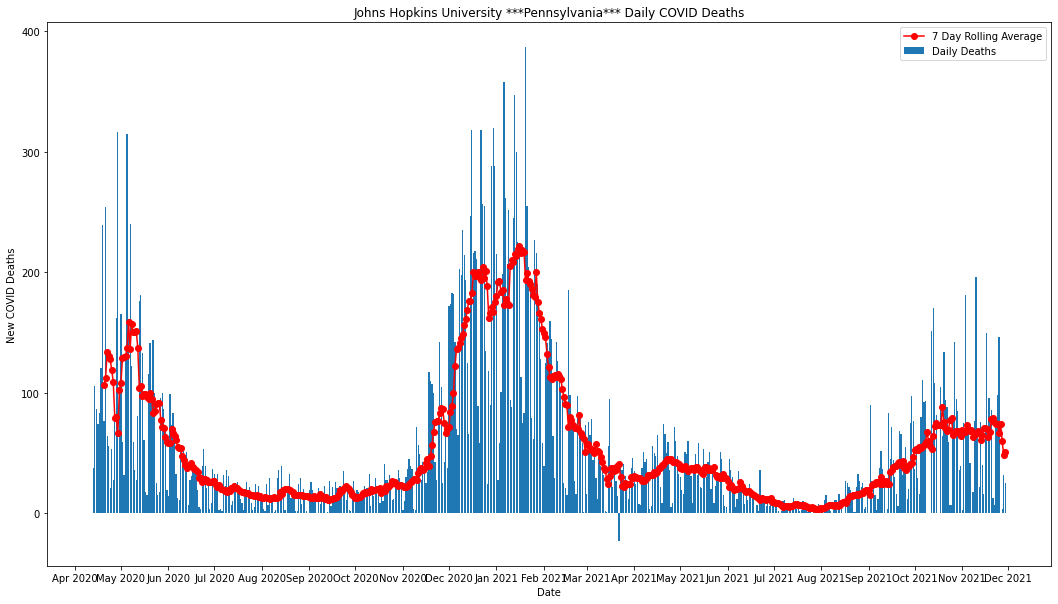

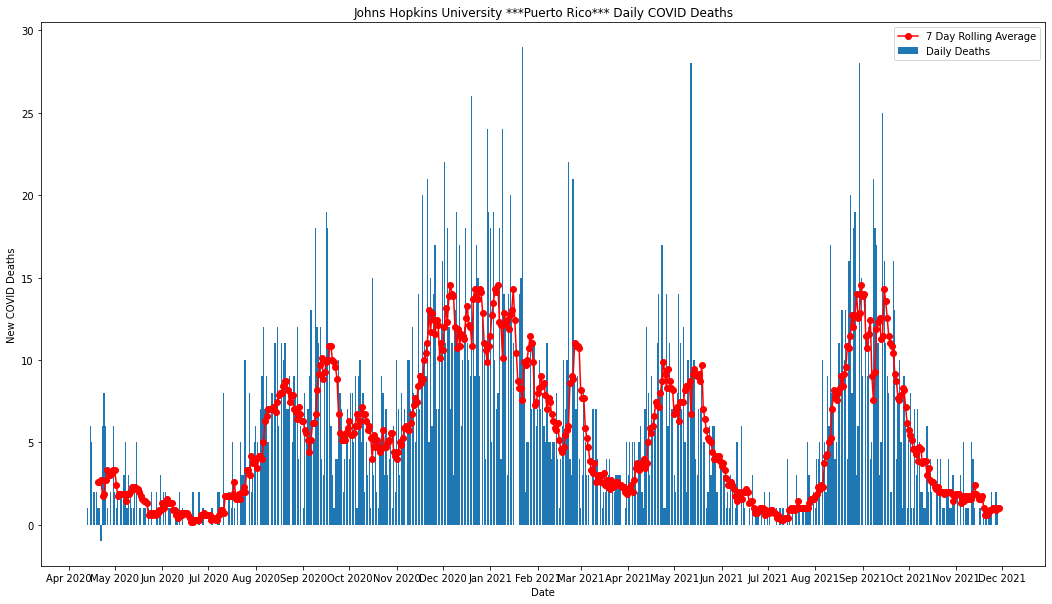

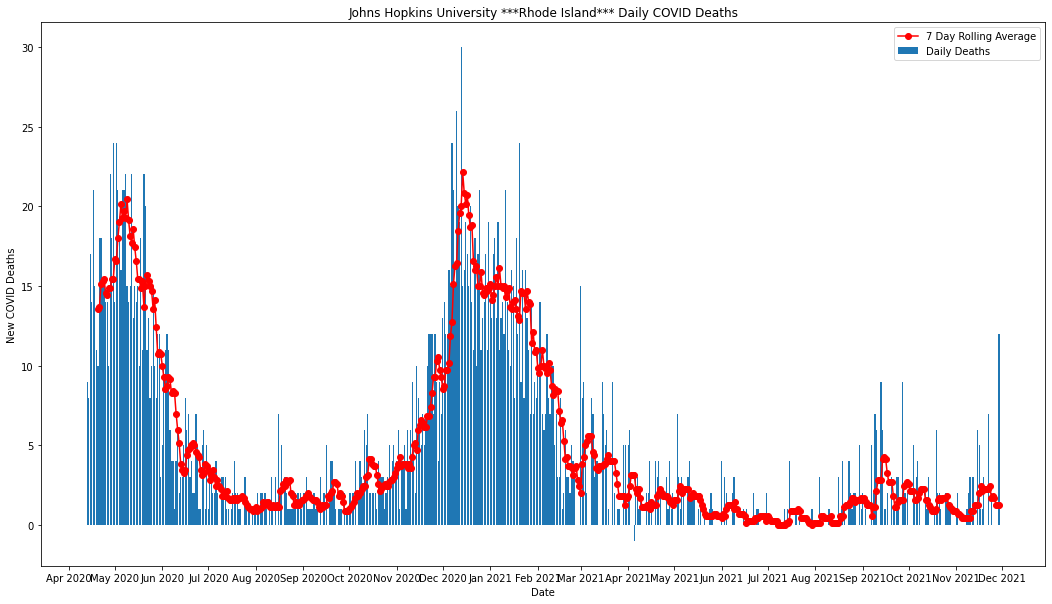

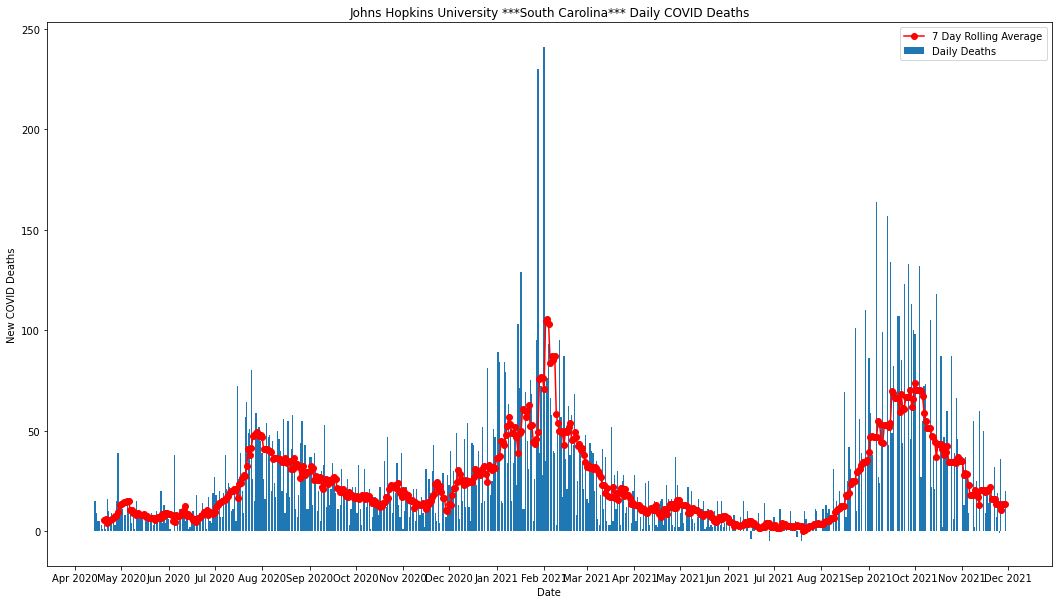

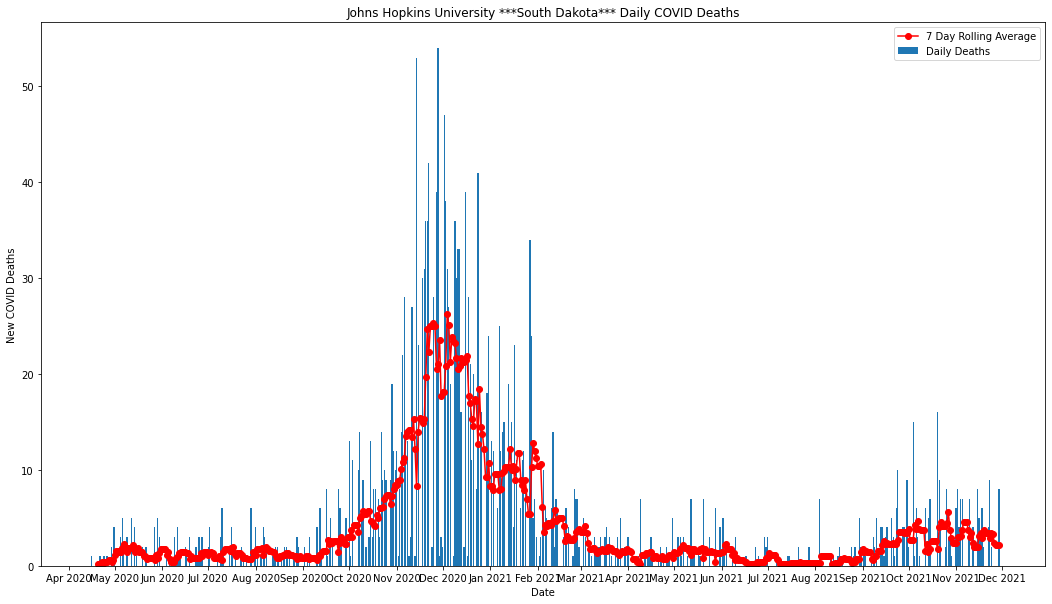

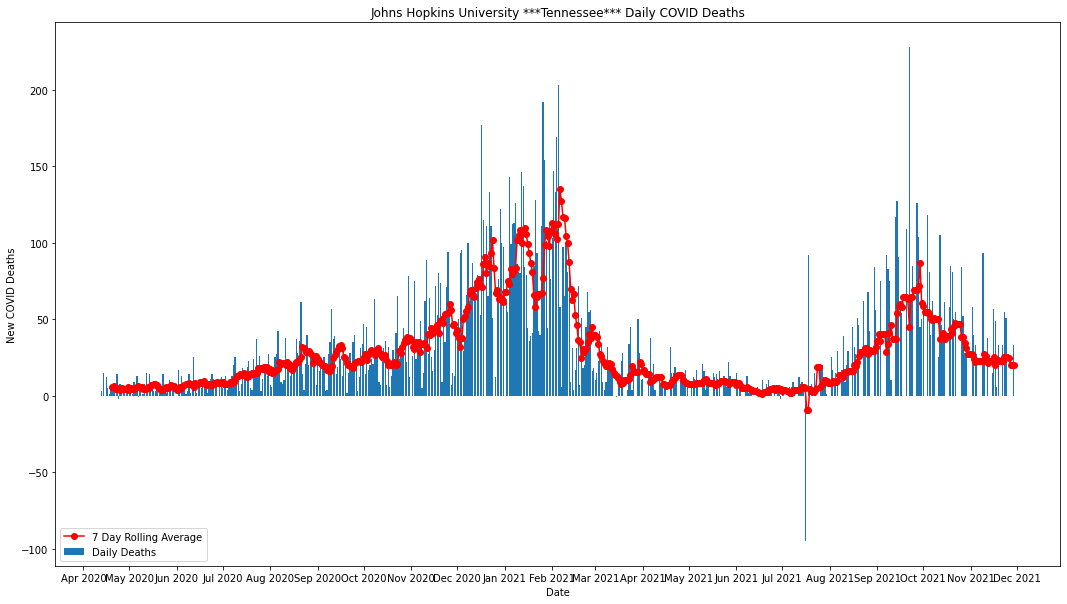

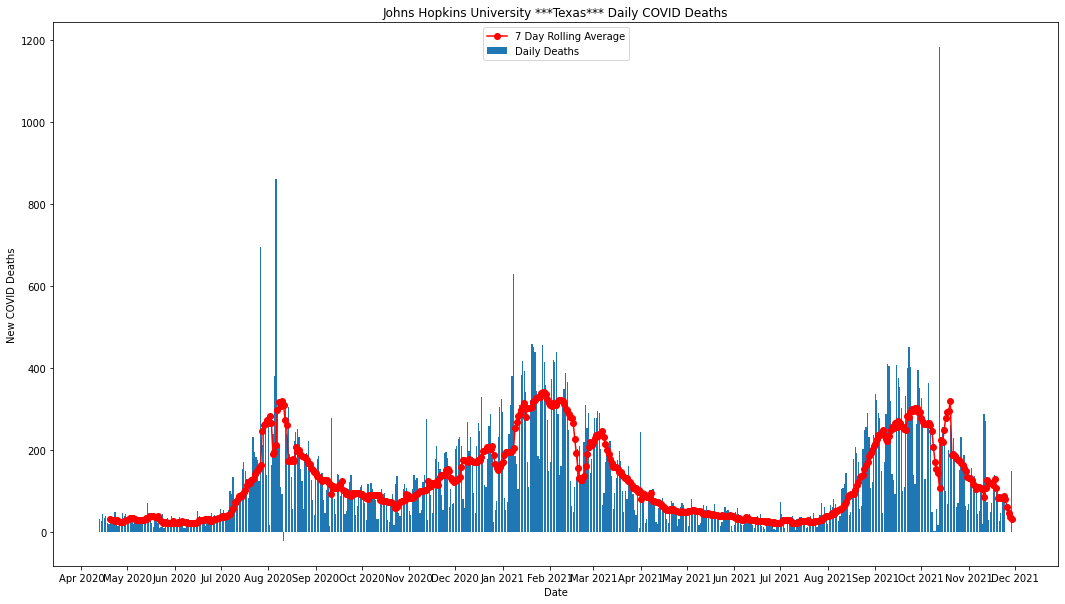

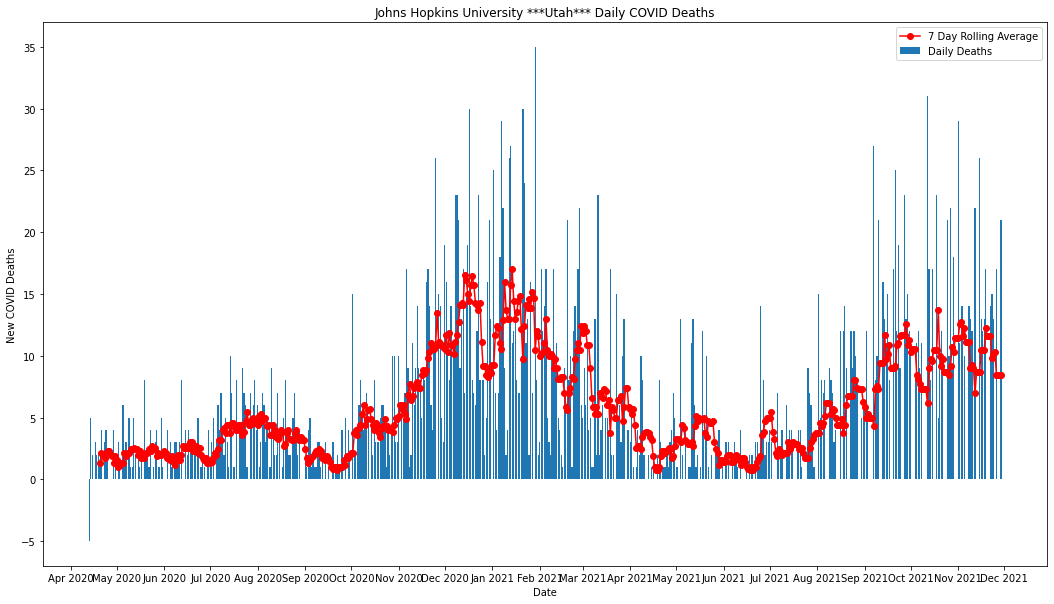

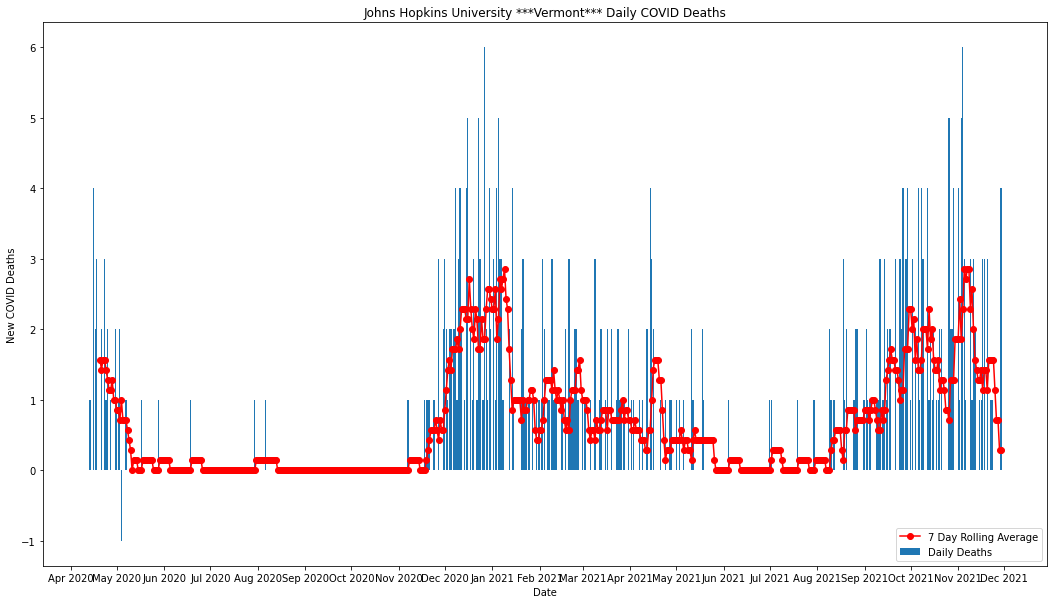

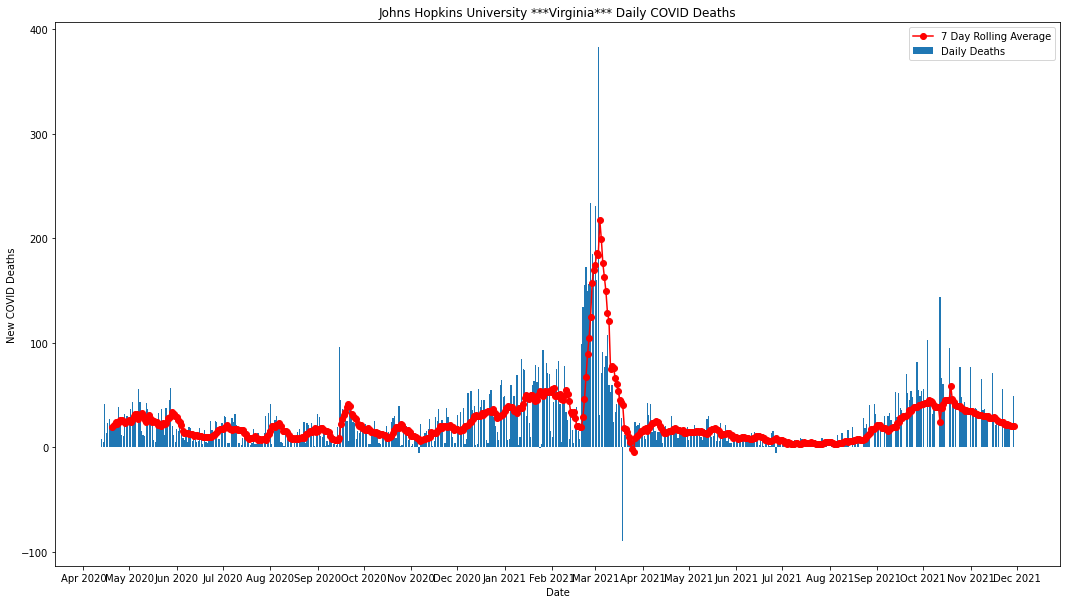

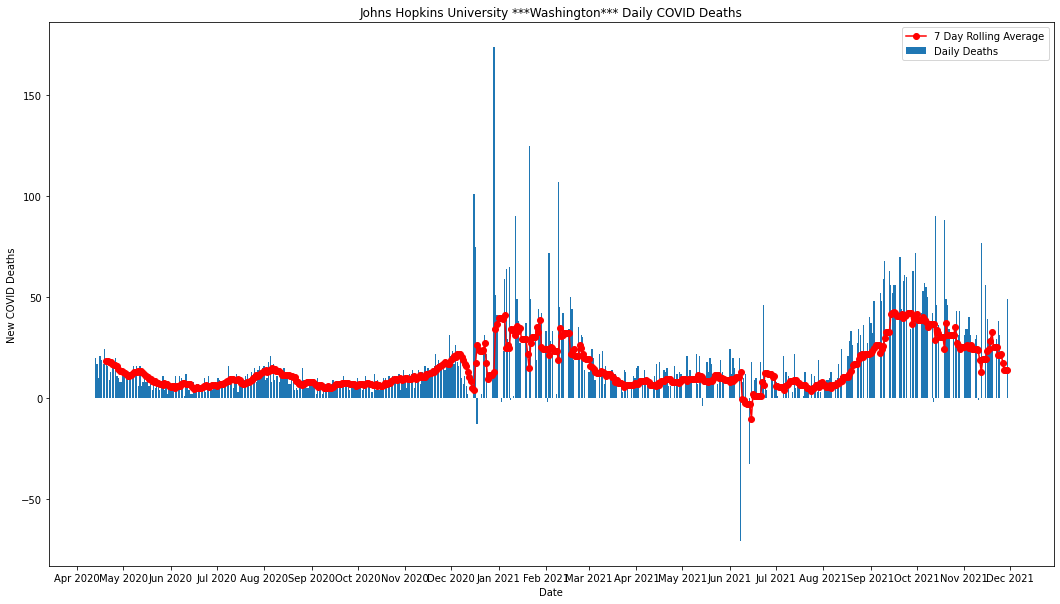

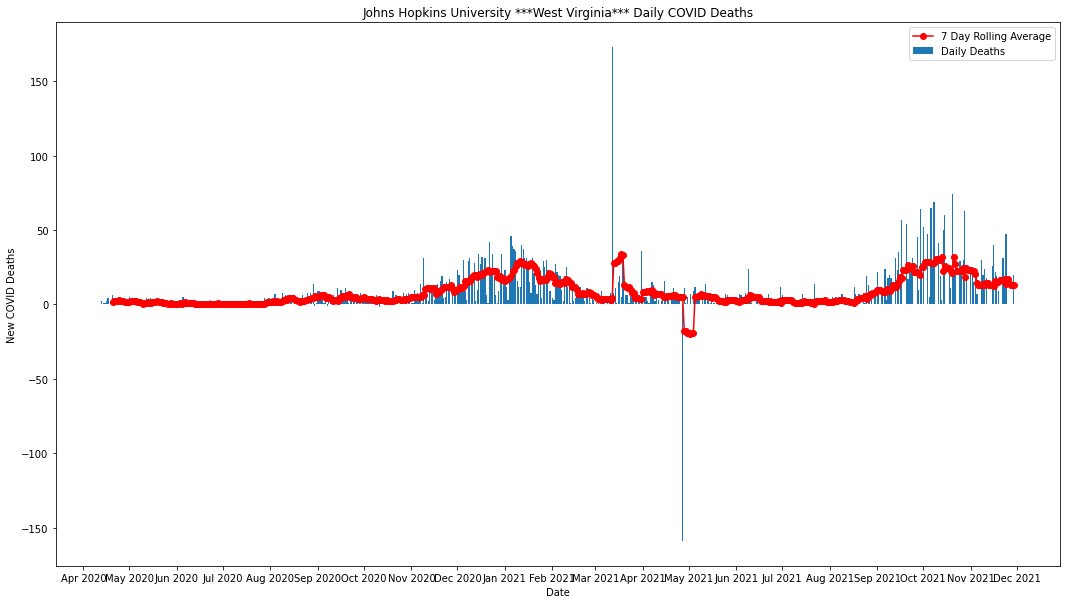

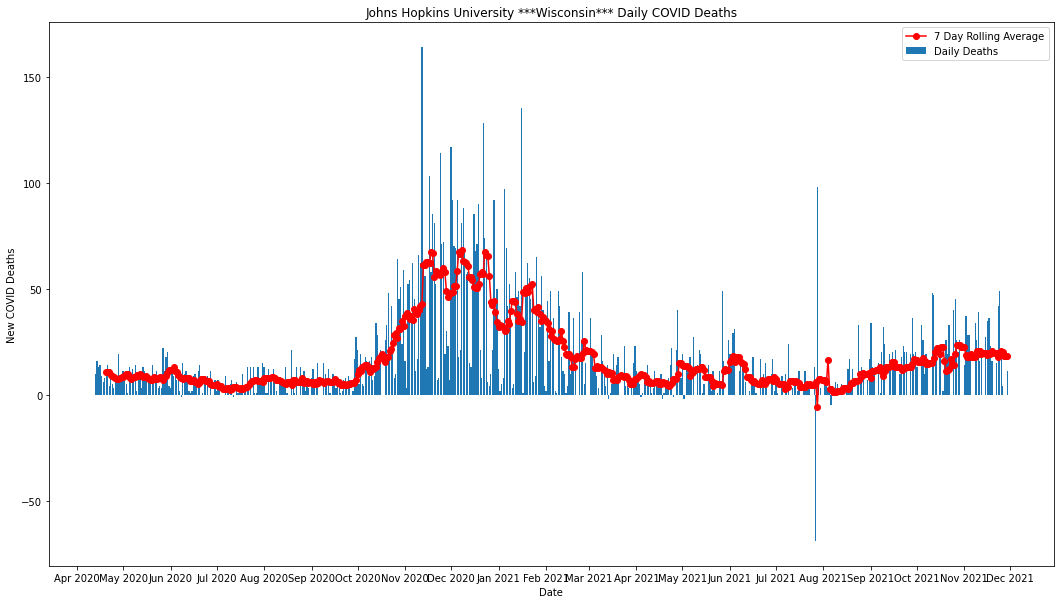

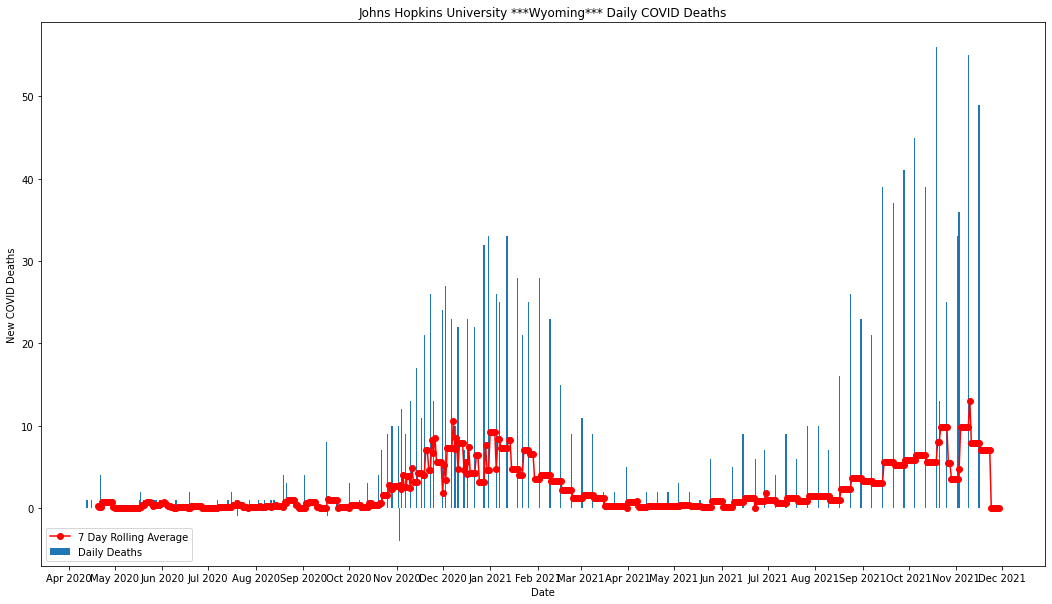

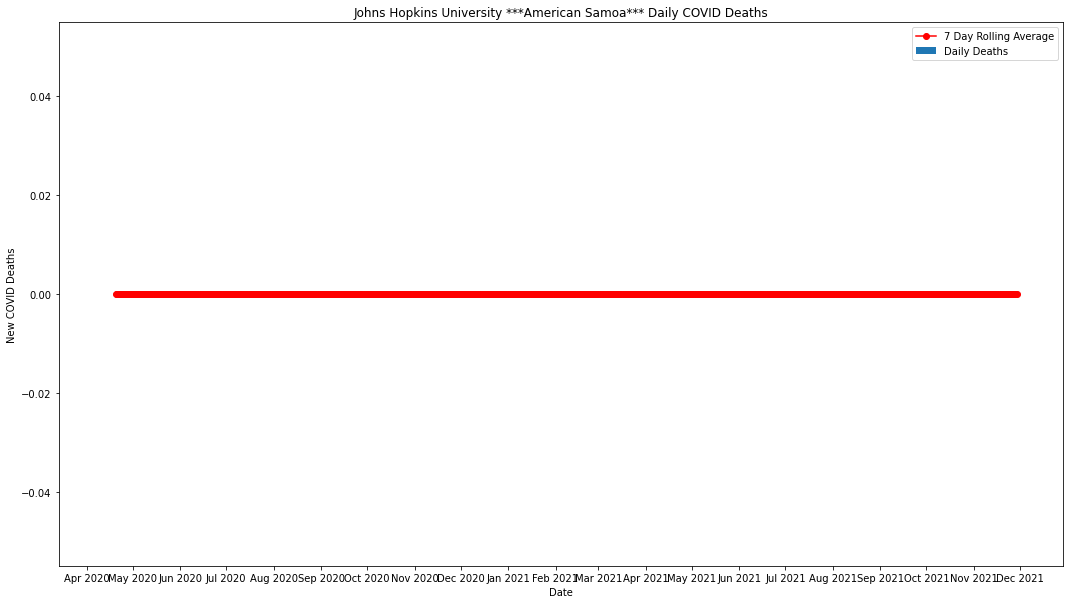

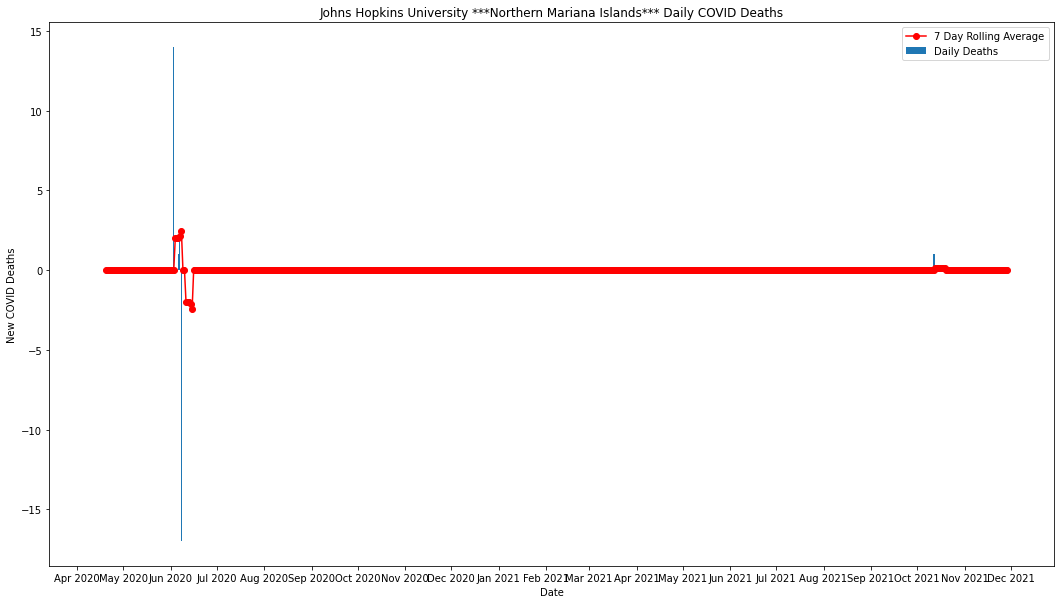

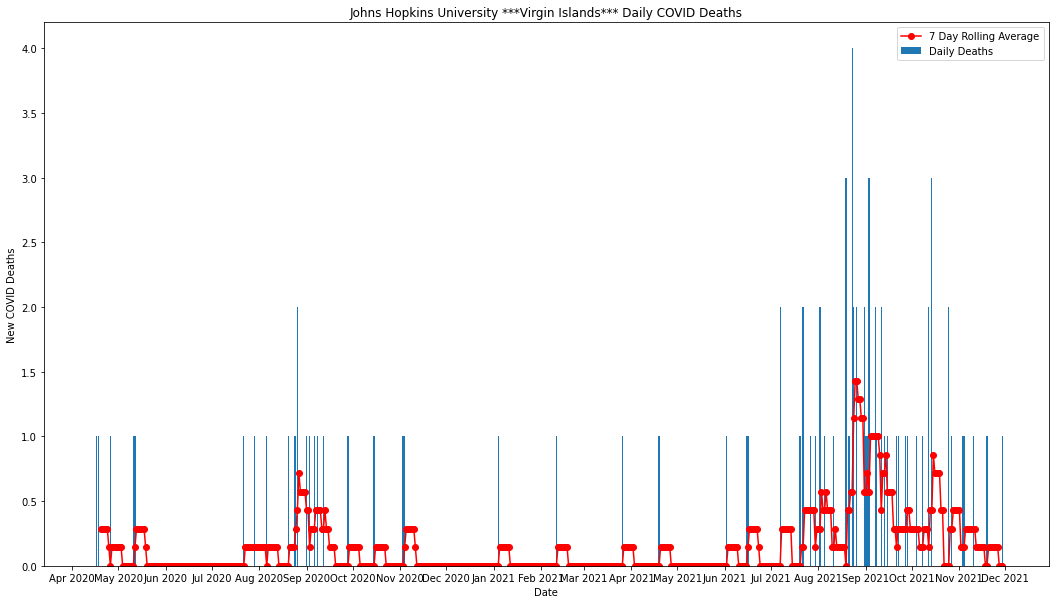

In [12]:
for x in State_list:
    return_deaths = process_state_deaths(x)
    chart_daily_deaths(return_deaths[0],return_deaths[1],return_deaths[2])

California
Oregon
Alabama
Florida
Georgia
Mississippi
Alaska
Ohio
Idaho
Maine
Connecticut
Vermont
Texas
Arkansas
North Carolina


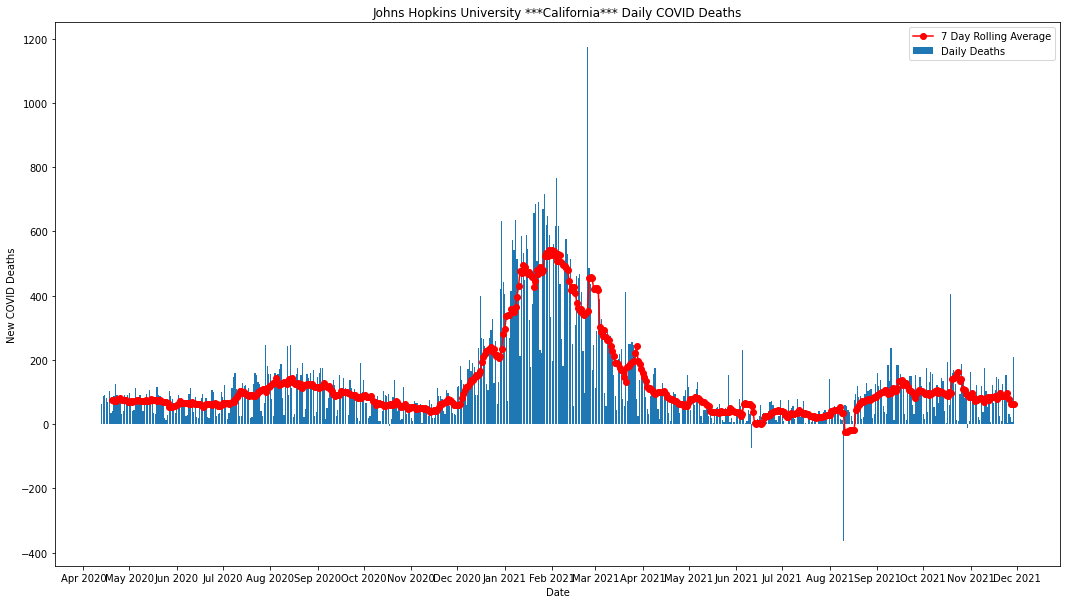

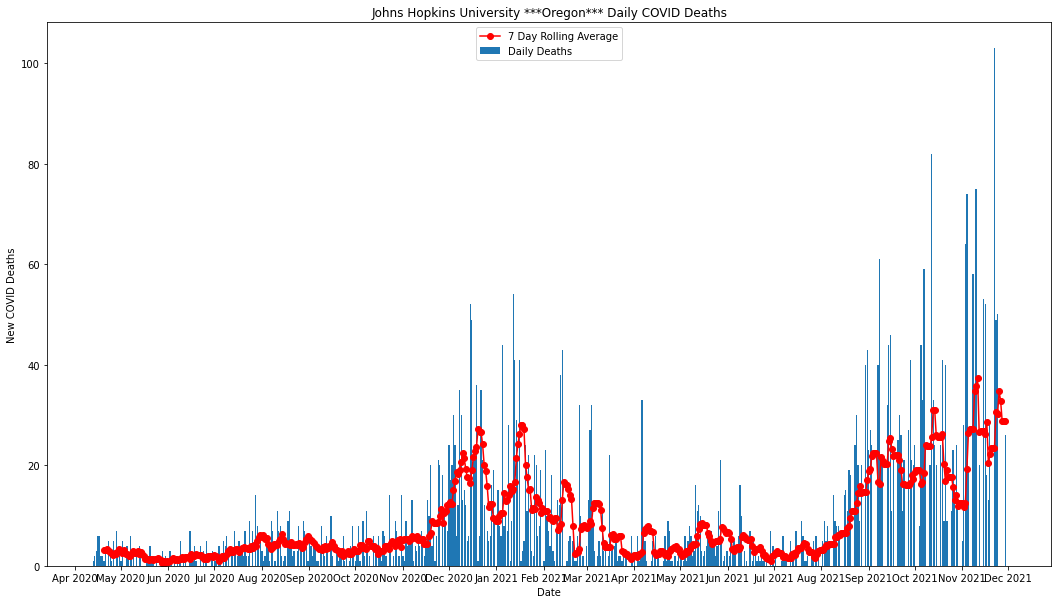

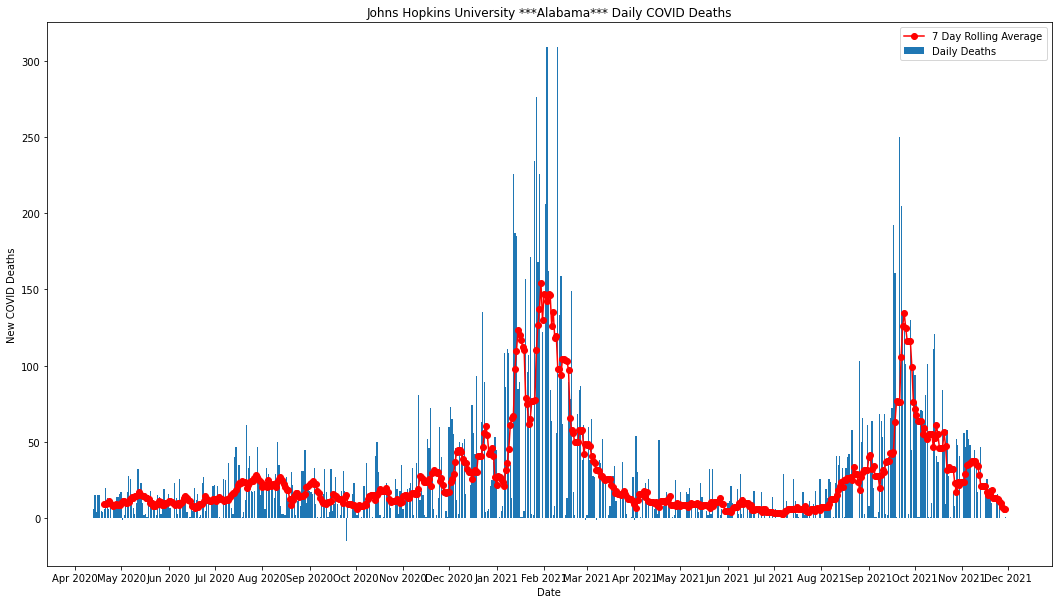

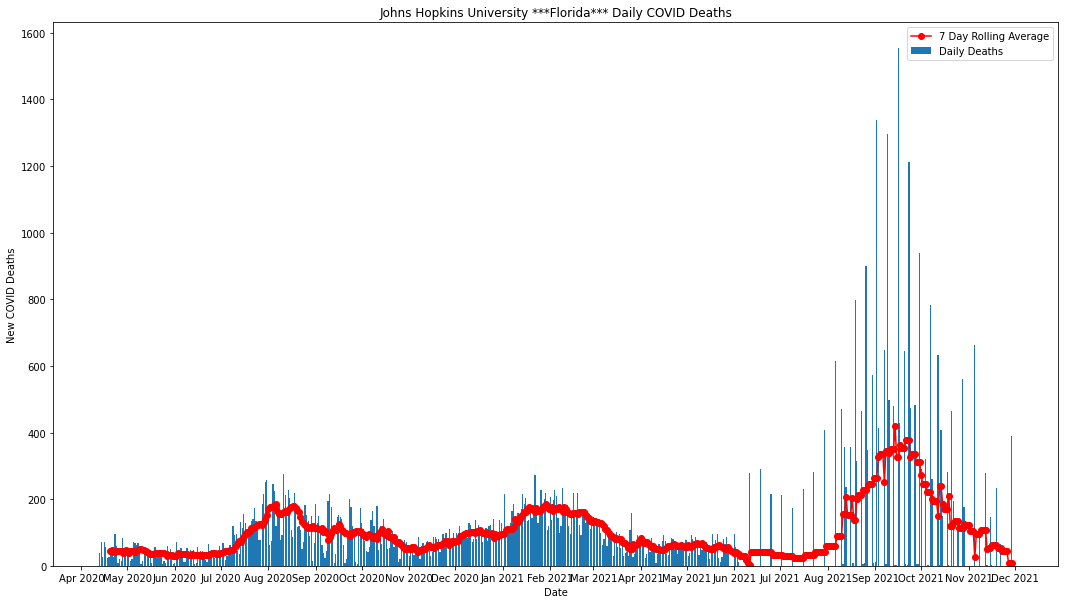

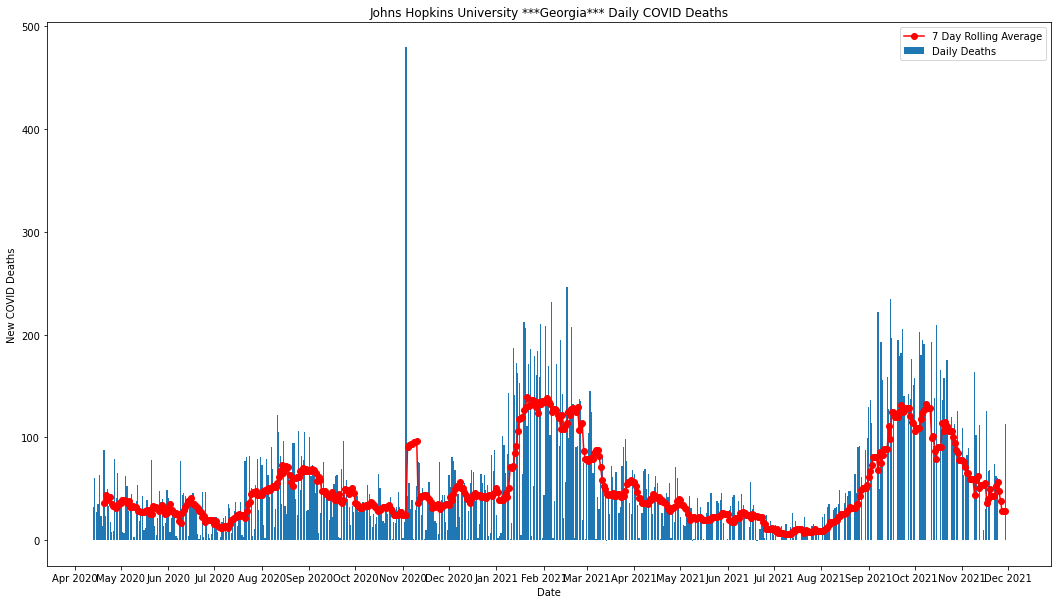

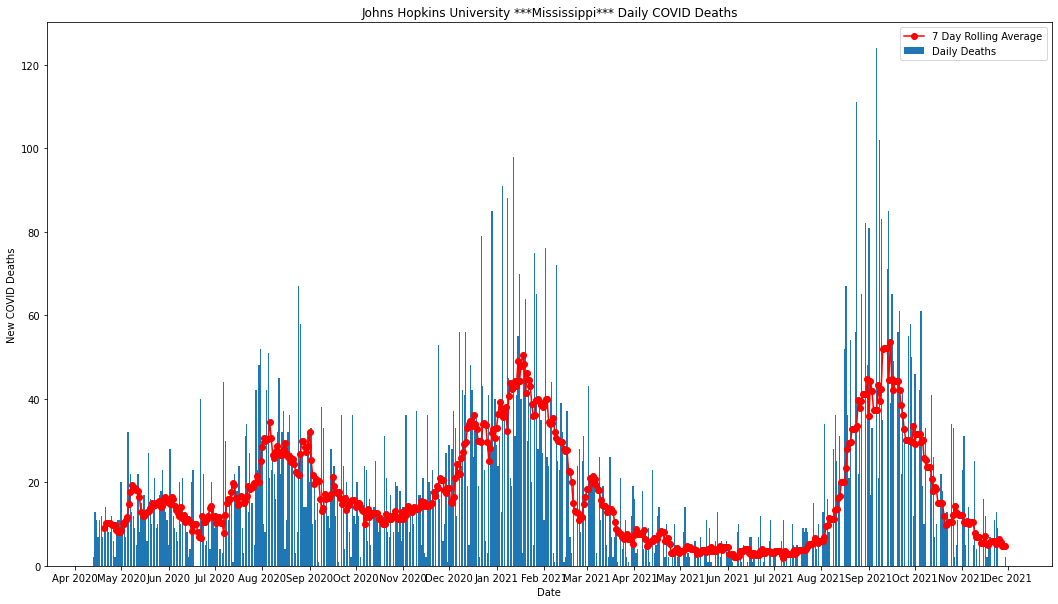

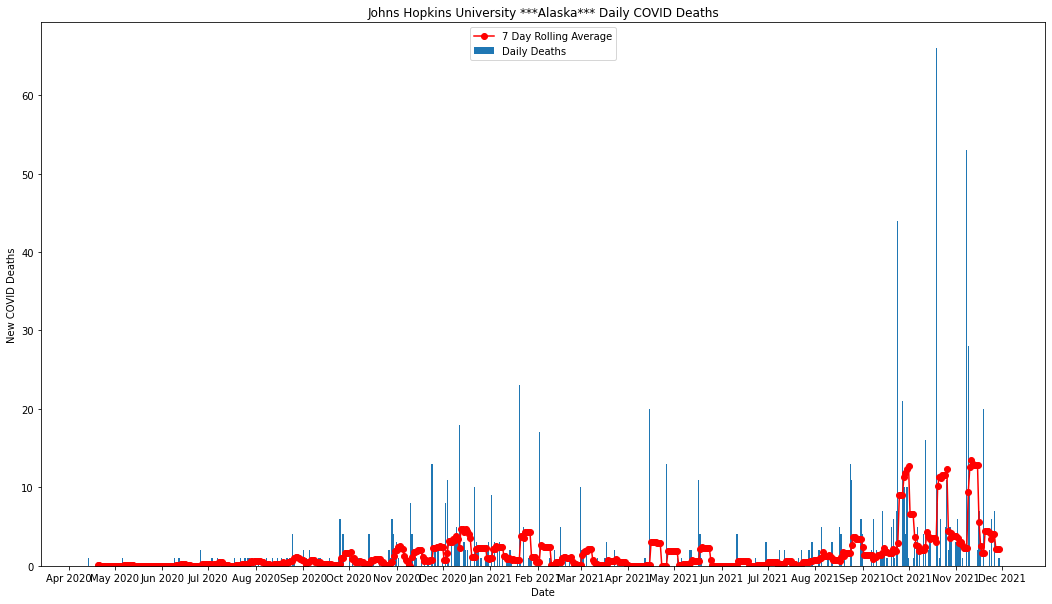

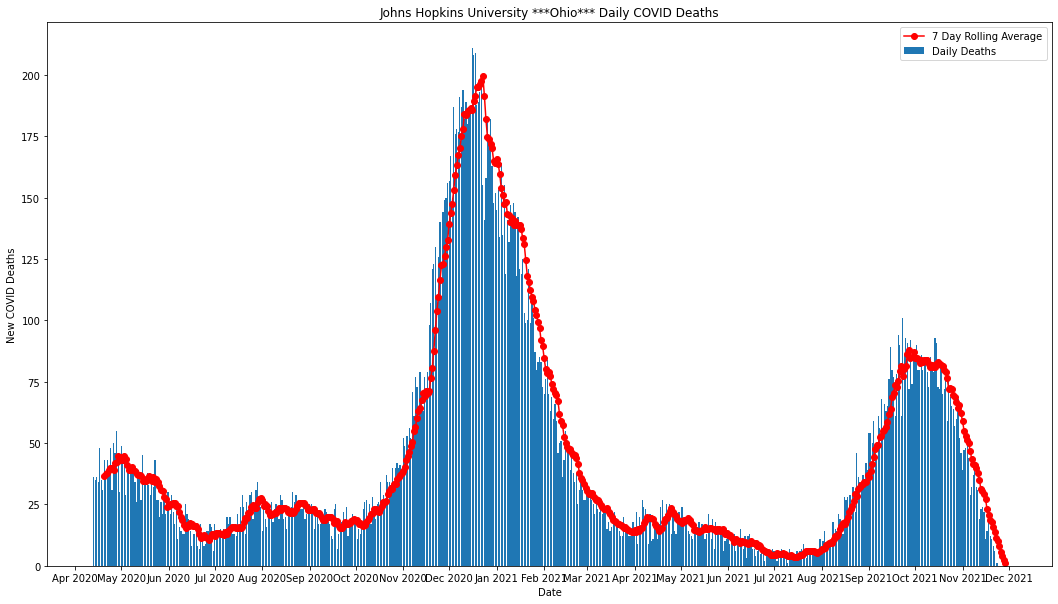

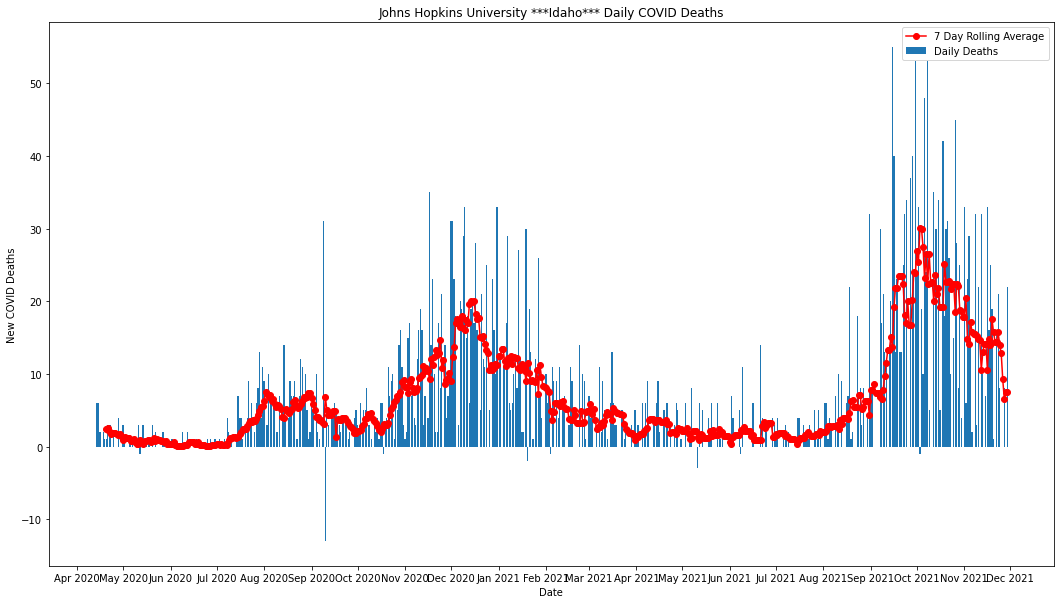

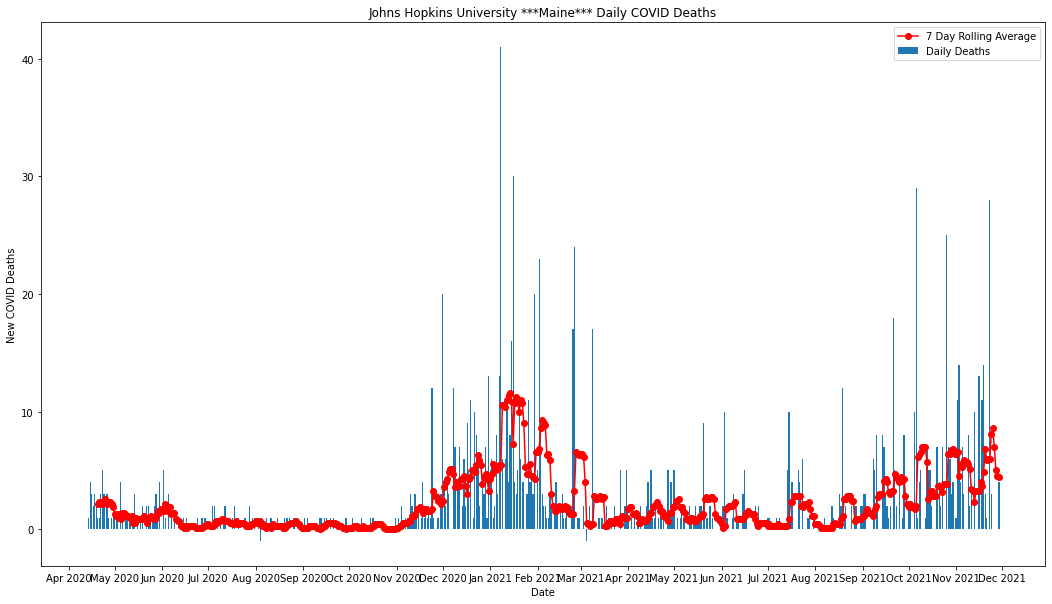

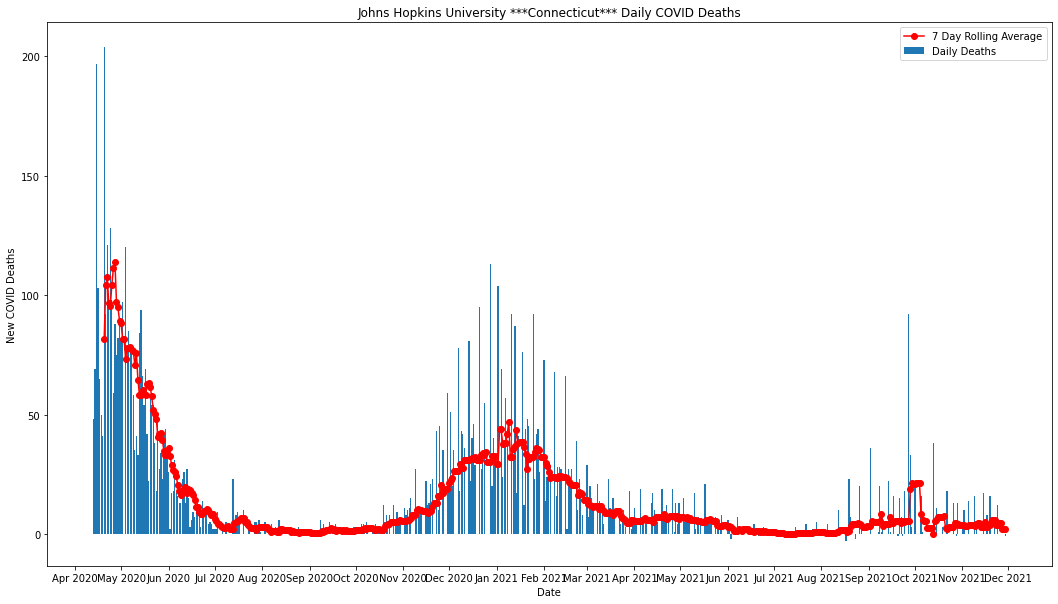

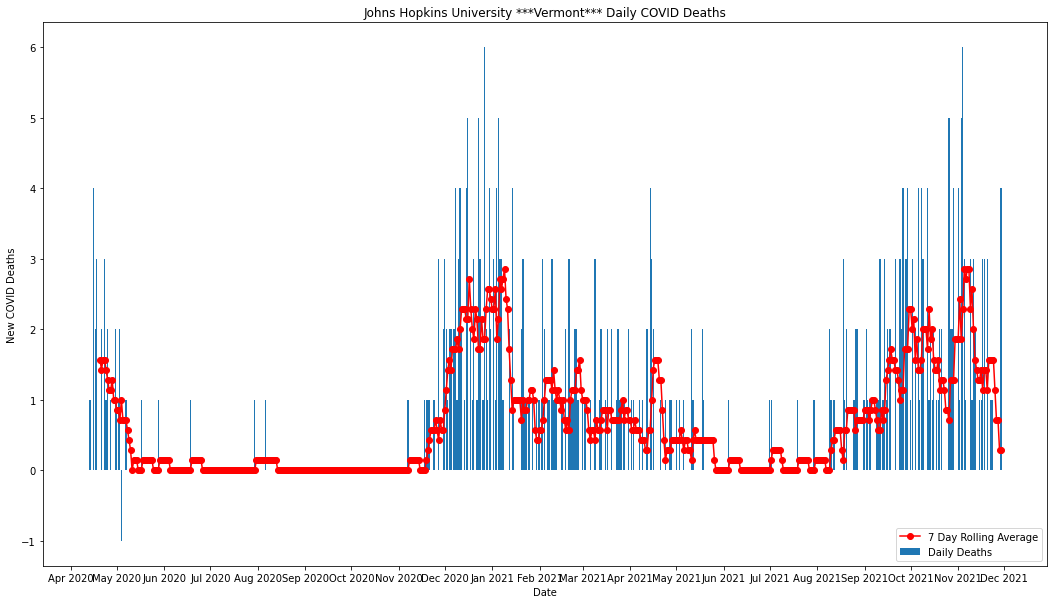

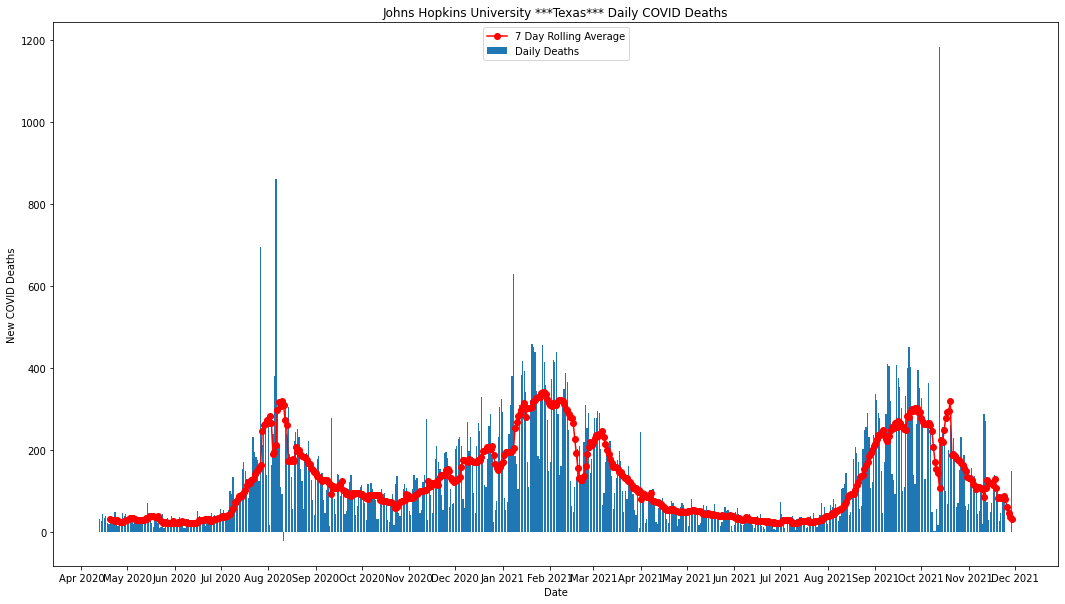

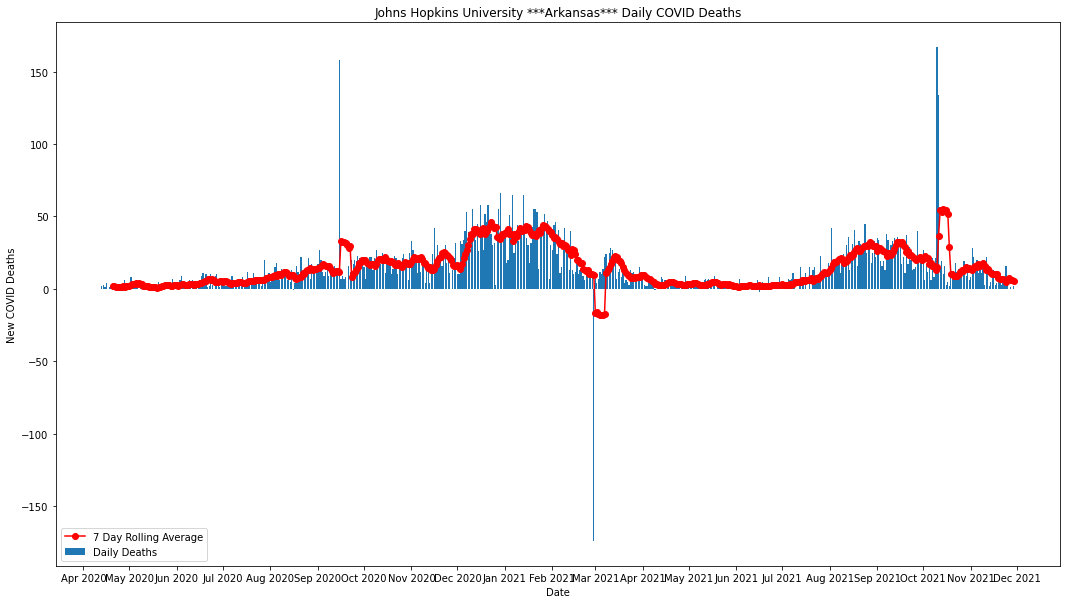

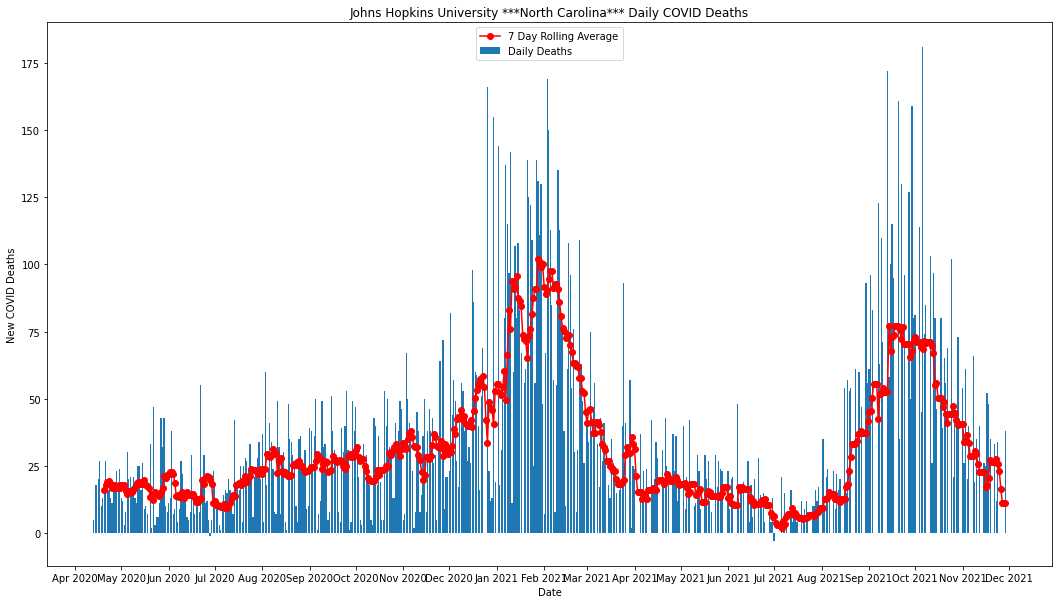

In [13]:
for x in ['California','Oregon','Alabama','Florida','Georgia', 'Mississippi','Alaska','Ohio','Idaho','Maine','Connecticut','Vermont','Texas','Arkansas','North Carolina']:
    return_deaths = process_state_deaths(x)
    chart_daily_deaths(return_deaths[0],return_deaths[1],return_deaths[2])